# Bank Marketing Analízis
## Készítette: Dóka Róbert
### Az adatsorról
Az adatok egy Portugál bank marketing kampányáról szól. A kampány több telefonhívásra épül annak kiderítése érdekében, hogy feliratkoznak-e a bank term deposit-ra ("yes" vagy "no").
### Features
Numerikus:
- Age
- Balance
- Day
- Duration
- Campaign
- Pdays
- previous

Kategorikus:

- Job
- Maritial
- Esucation
- Default
- Housing
- Loan
- Month
- Poutcome

Target:
- y

## Az adatsor vizsgálata

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bank-full.csv", sep=";")
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [5]:
for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Megfigyelések

- Nincsenek hiányos értékek
- Az átlag évi fizetésnél megfigyelhető negatív számok, további vizsgálatot követelnek
- A telefonhívás ideje alatt vannak kiugró értékek
- A kampány oszlopban is vannak kiemelkedő értékek ezek további vizsgálatot igényelnek
- Sok különböző típusok vannak (bináris, kategorikus, numerikus), ezek a későbbiek során átkódolást igényelnek
- Az oszlopok közötti szórás nagy, modelltanításnál normalizálásra lesz szükségünk

## A célváltozó eloszlása

Text(0.5, 1.0, 'Distribution of Target label')

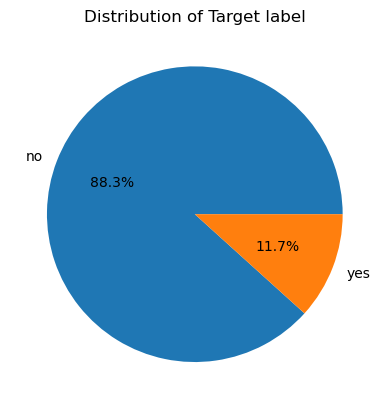

In [45]:
plt.pie(df["y"].value_counts(), autopct='%1.1f%%', labels = ["no","yes"])
plt.title("Distribution of Target label")

## Megfigyelések

- Nem feliratkozók 88.3%-ék míg akik igénybevették 11.7%. Innen látszik, hogy az adatsor igen kiegyensúlyozatlan ezért később modellkiértékeléskor figyelni kell a jó mérőszámok megválasztására.

## A változók eloszlása

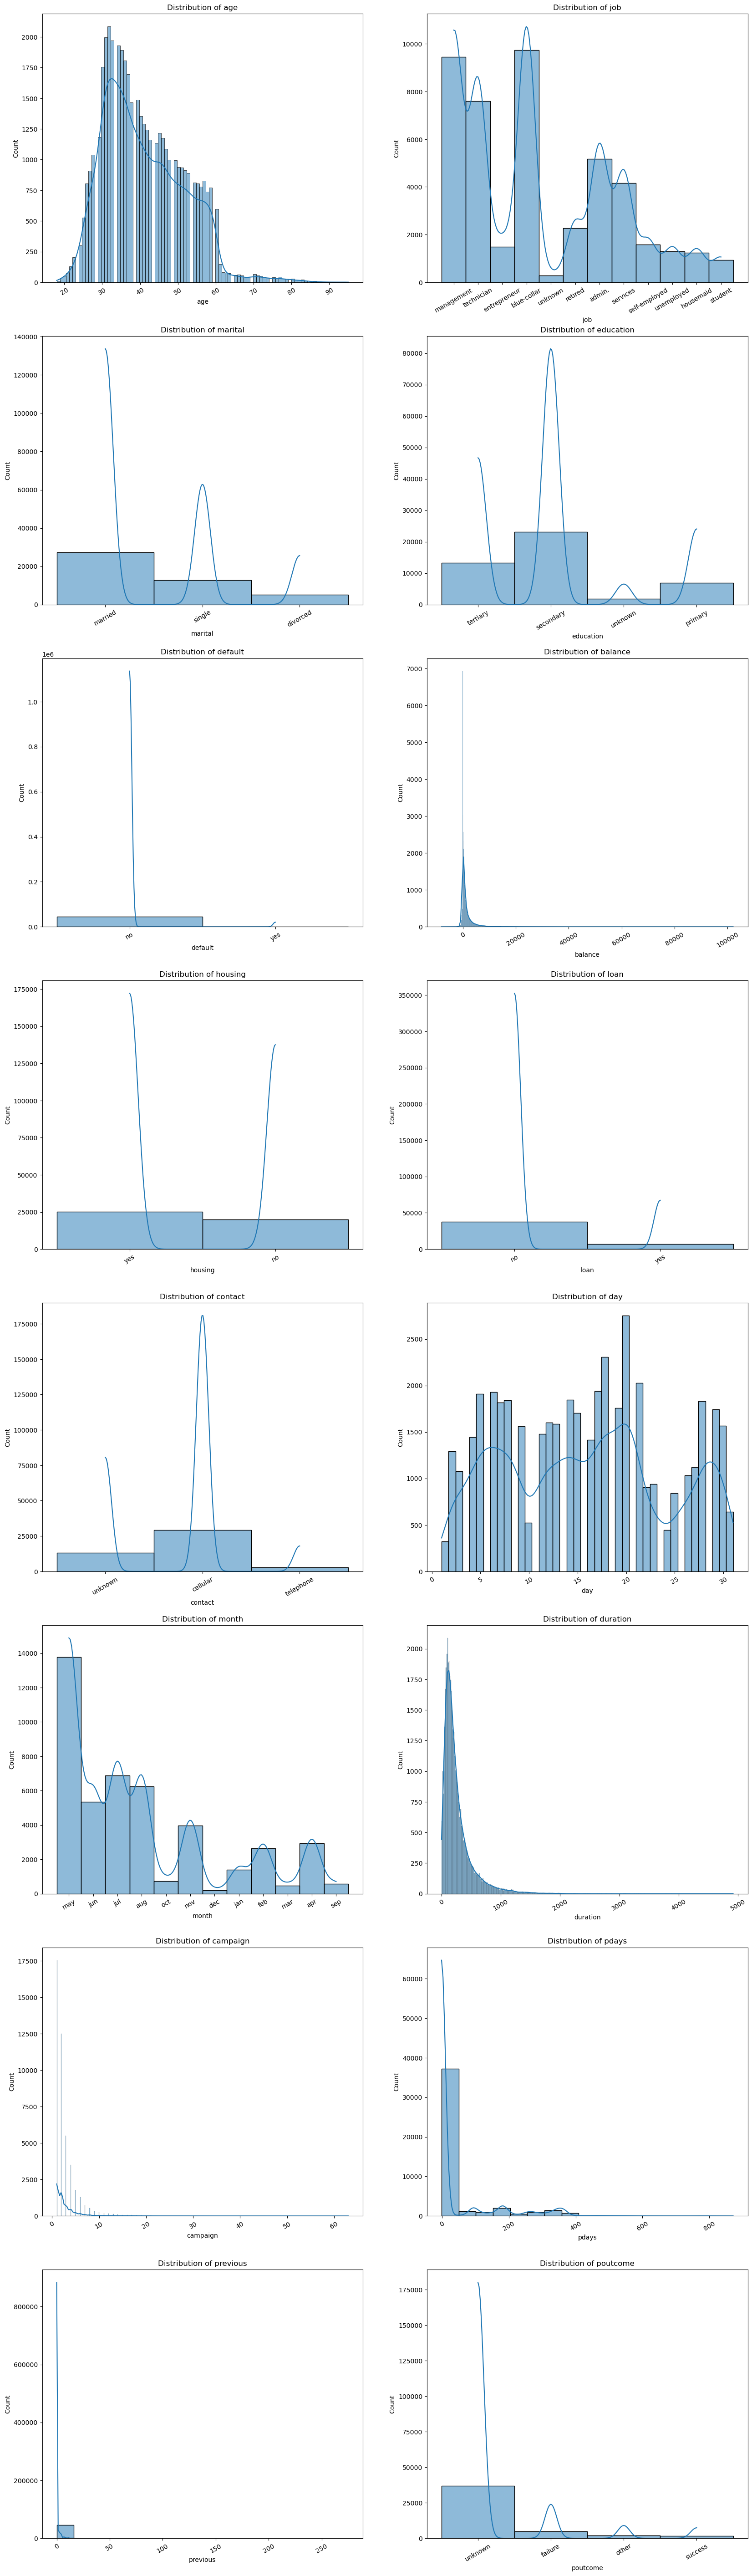

In [22]:
fig, axes = plt.subplots(8, 2, figsize=(20, 72))

fnames = df.columns
a = 0
b = 0

for column in fnames[:-1]:
    if b == 2:
        b = 0
        a += 1
    
    sns.histplot(data=df[column], kde=True, ax = axes[a,b])
    axes[a,b].set_title(f"Distribution of {column}")
    axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
    b += 1
plt.show()

## Megfigyelések

- A telefonhívások nagy százaléka blue-collar,management,techician dolgozókkal volt
- A házasok nagyobb számban voltak
- Az alacsonyabb iskolázott szintűek kissebbségben voltak
- A napok elaránylanak egymás között míg a hónapokban a május kiemelkedőbb volt
- Az ismeretlen poutcome túlnyomó részben volt
- A default oszlop igen gyenge eloszlása hibára utalhat

## Numerikus változók kiugró értékeinek vizsgálata

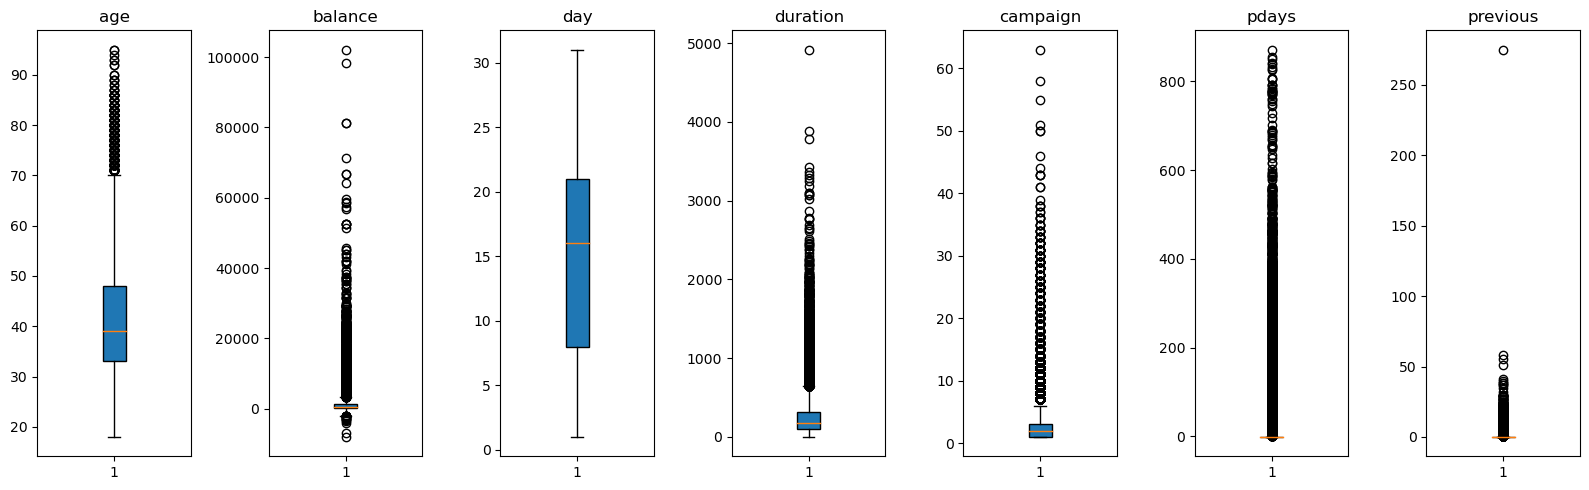

In [66]:
fig, axes = plt.subplots(1, 7, figsize=(16, 5))
a = 0
for i in df.select_dtypes(include=np.number).columns:
    axes[a].boxplot(df[i], patch_artist=True)
    axes[a].set_title(i)
    a+=1
plt.tight_layout()

## Megfigyelések
- A korosztály 50%-a a 35-50-es rétegbe esik
- A fizetésnél az átlag igen alacsonyan mozog míg vannak igen kiugró eredmények
- A napok elaránylanak, nincsenek anomáliák
- A telefonhívás időtartamánál vannak igen hosszú hívások, ezek utalhatnak hibára
- Az előzőleg már felkeresett részen az egyik kliens kiemelkedik mindenkitől ez hiba az adatsorban

## Korrelációk vizsgálata

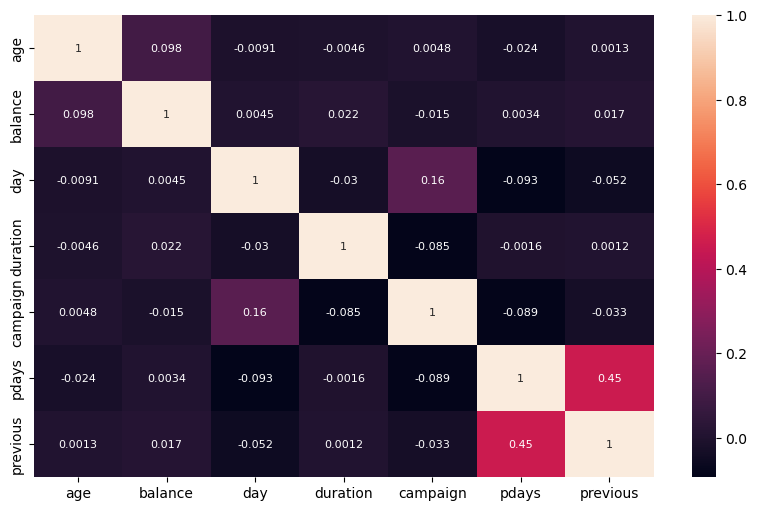

In [46]:
corr_df = df[["age","balance","day","duration","campaign","pdays","previous"]]

correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 8})
plt.show()

## Megfigyelések

- Nincsenek nagy pozitív vagy nagy negatív korrelációk
- A pdays és a previous között van a legnagyobb korreláció, de nem akkora, hogy ezzel baj legyen (nem okoz feature duplikációt)

## Numerikus változók egymás közti eloszlásának vizsgálata

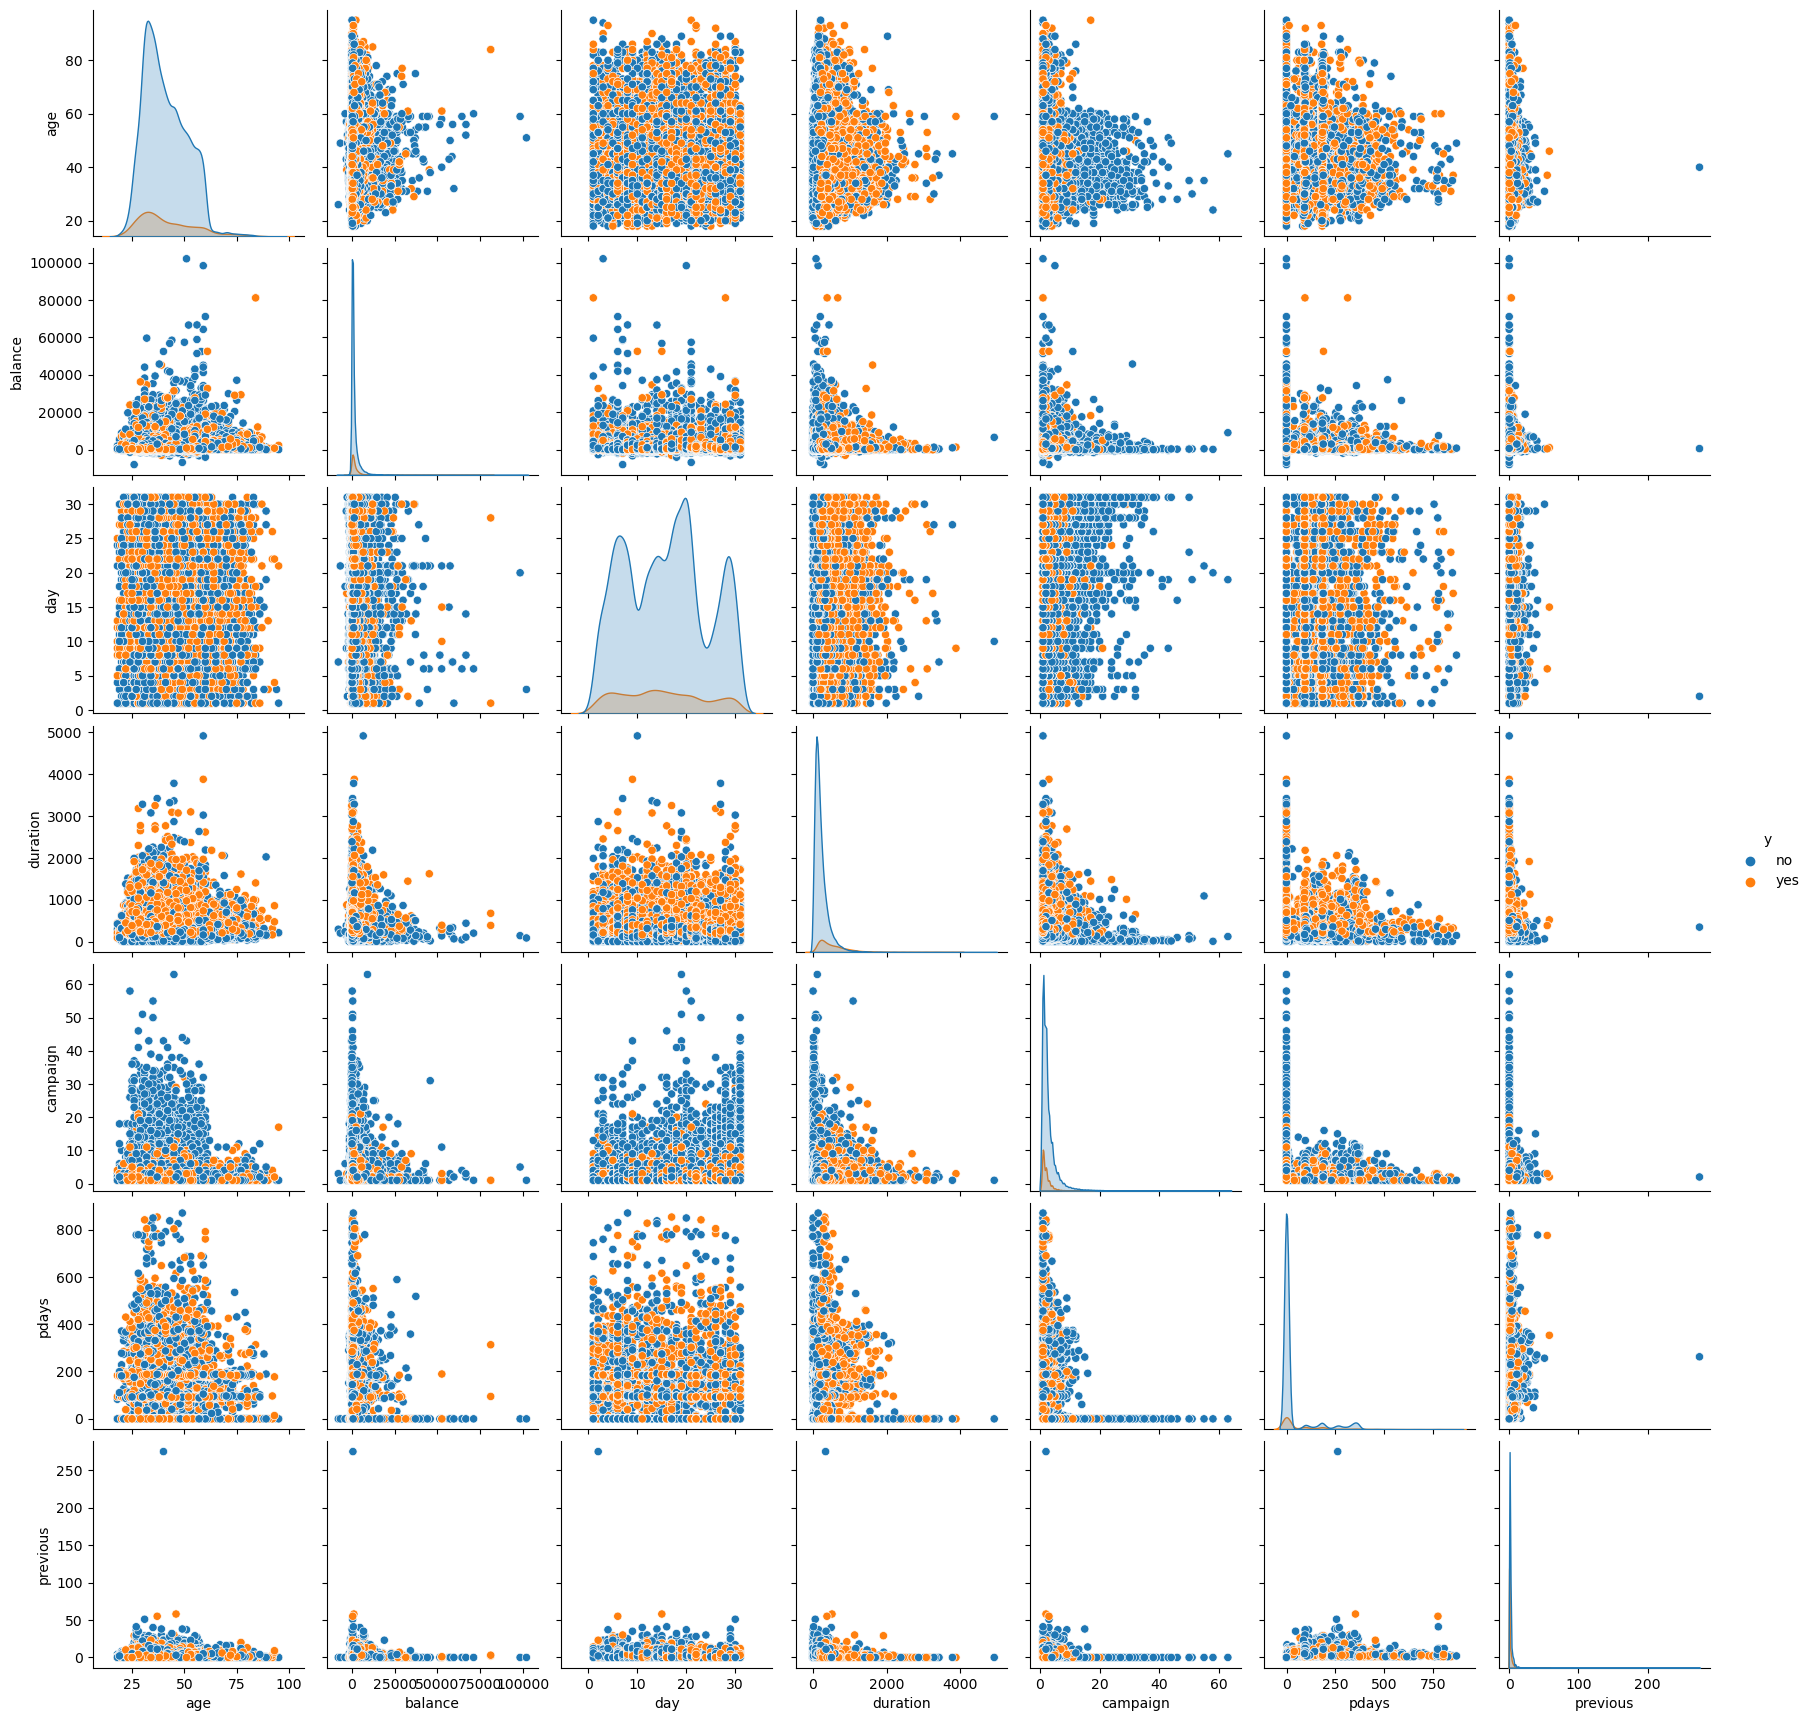

In [68]:
sns.pairplot(df, hue="y")

## Megfigyelések

- A napoknál eloszlanak a feliratkozások aránya, nem annyira nérvadó változó
- A hívás időtartamánál látszik, hogy minden 0 érték a nem feliratkozás címkét kapta (nincs hiba)
- A kornál megfigyelhető egy kiemelkedő réteg, ez további vizsgálatot követel
- Az kampány alatti megkeresések és korosztálynál megfigyelhető egy lényeges különbség, ez további vizsgálatot követel

## Kampány és korosztály vizsgálata

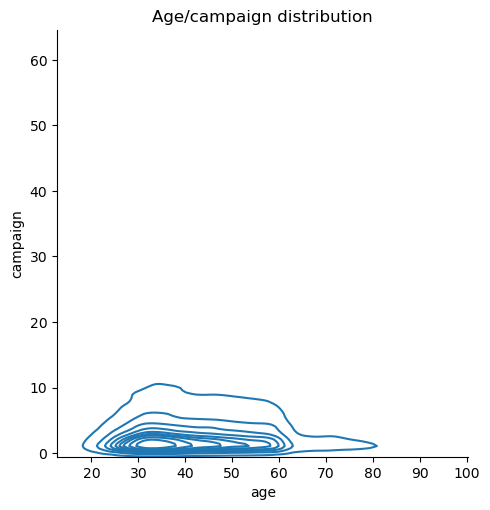

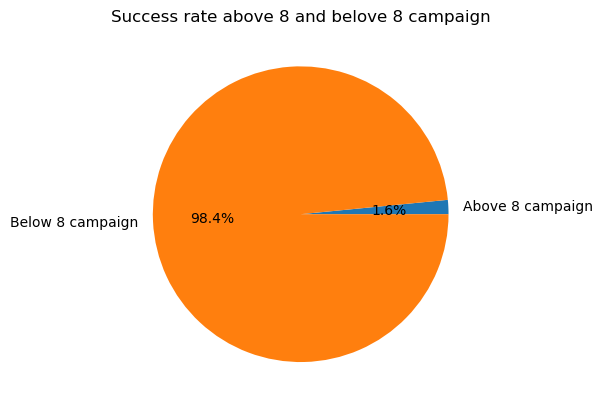

In [76]:
sns.displot(data=df, x="age", y="campaign", kind="kde")
plt.title("Age/campaign distribution")
plt.show()

d = df[(df['y'] == 'yes') & (df['campaign'] >8)]
d = np.array(d)
f = df[(df['y'] == 'yes') & (df['campaign'] <= 8)]
f = np.array(f)
z = np.array([d.shape[0], f.shape[0]])
plt.pie(z, autopct='%1.1f%%', labels = ["Above 8 campaign","Below 8 campaign"])
plt.title("Success rate above 8 and belove 8 campaign")
plt.show()

## Megfigyelések

- Az első ábra szintvonalaiból kivehető, hogy a hívások nagy része 8 alatti
- A második árbán tisztán kivehető, hogy a 8 alatti megkeresések kampány idő alatt sokkal hatékonyabb mint a 8 felettiek

## Numerikus változók rétegbeli eloszlásának vizsgálata

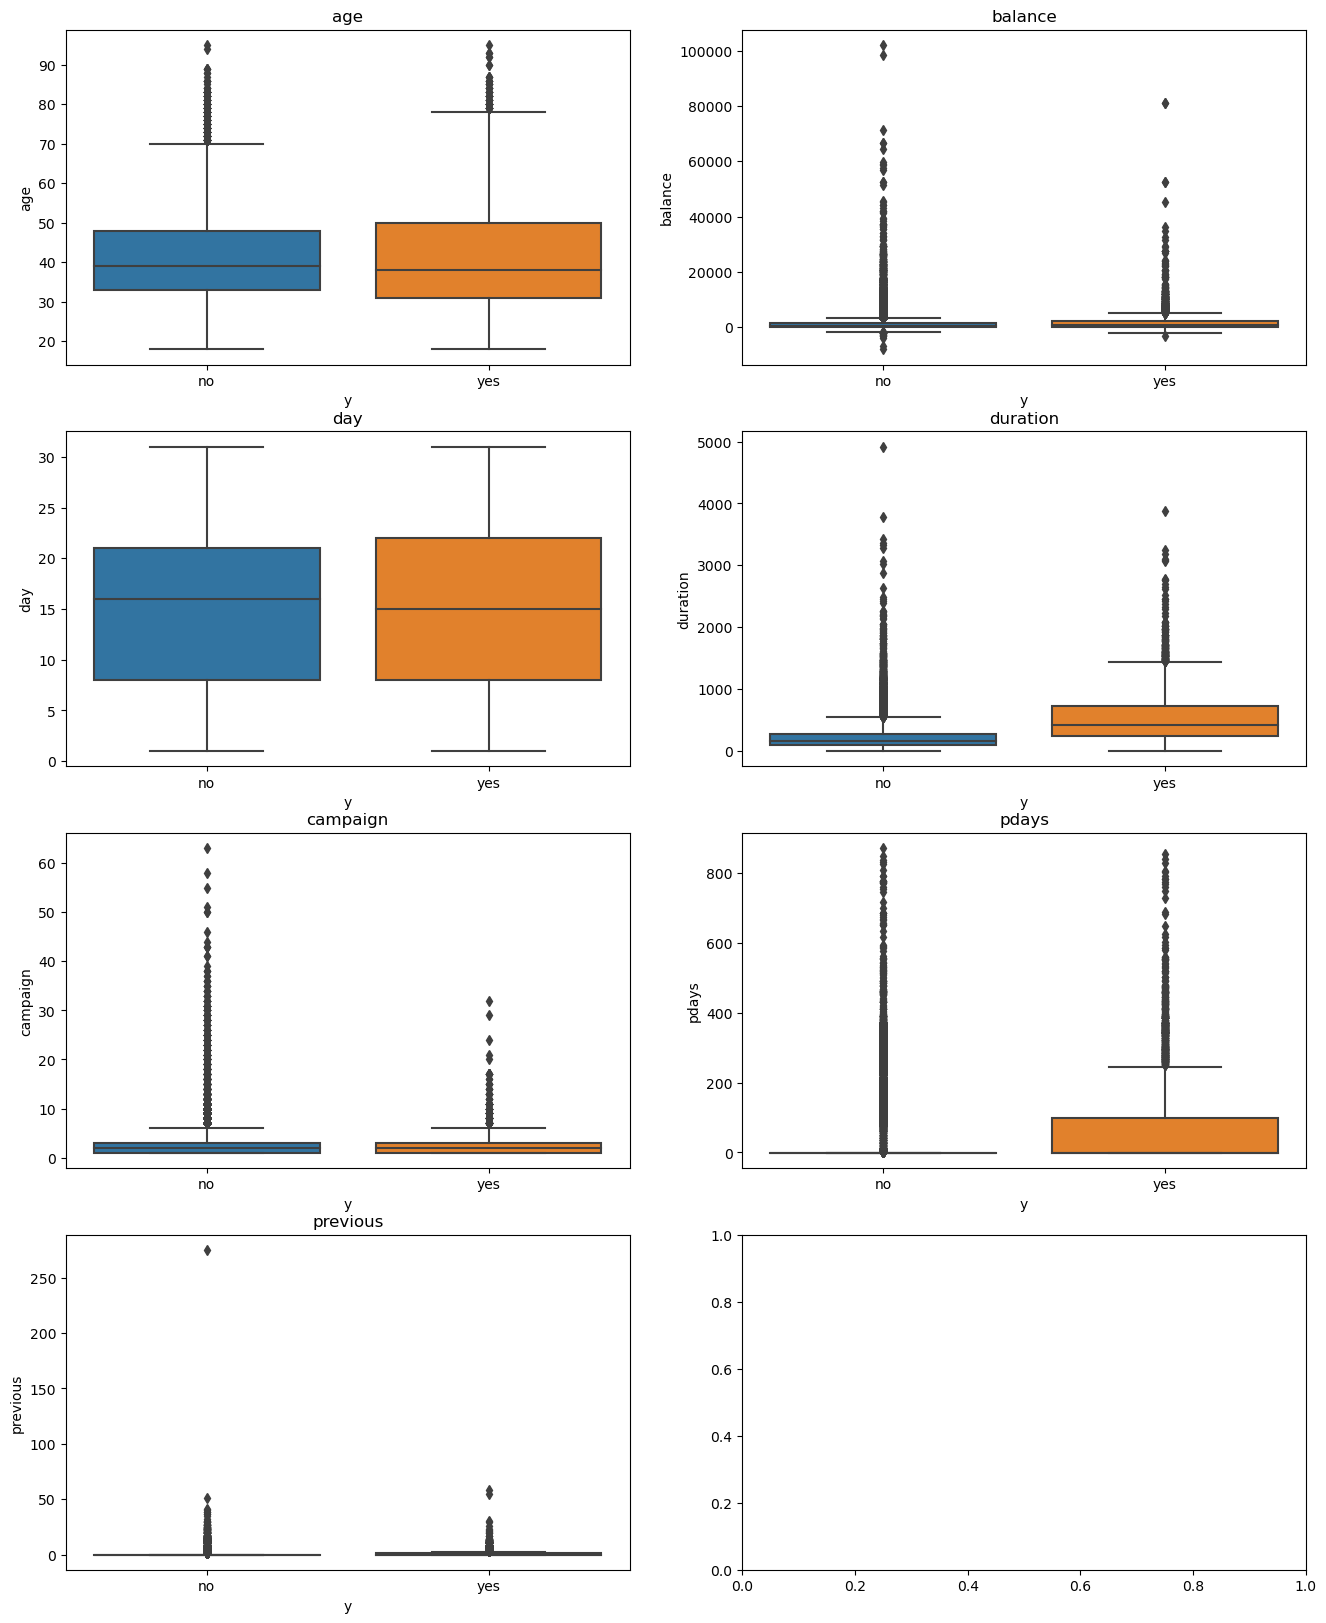

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

a = 0
b = 0

for i in fnames:
    if b == 2:
        b = 0
        a += 1
    
    if df[i].dtype == "int64":
        sns.boxplot(data=df,x="y", y=i, ax = axes[a,b])
        axes[a,b].set_title(i)
        b+=1
plt.show()

## Megfigyelések

- A fizetésnél a kiugró értékek inkább nem iratkoztak fel
- A kampány alatti felkeresésnél 35 felett nem voltak olyanok akik feliratkoztak volna
- Az előző megkereséseknél biztosak lehetünk abban hogy a 250+-os érték egy hiba
- A korosztálynál észrevehető, hogy a 35 és 50 közöttiek mondtak igent főleg

## A munkák eloszlásának vizsgálata

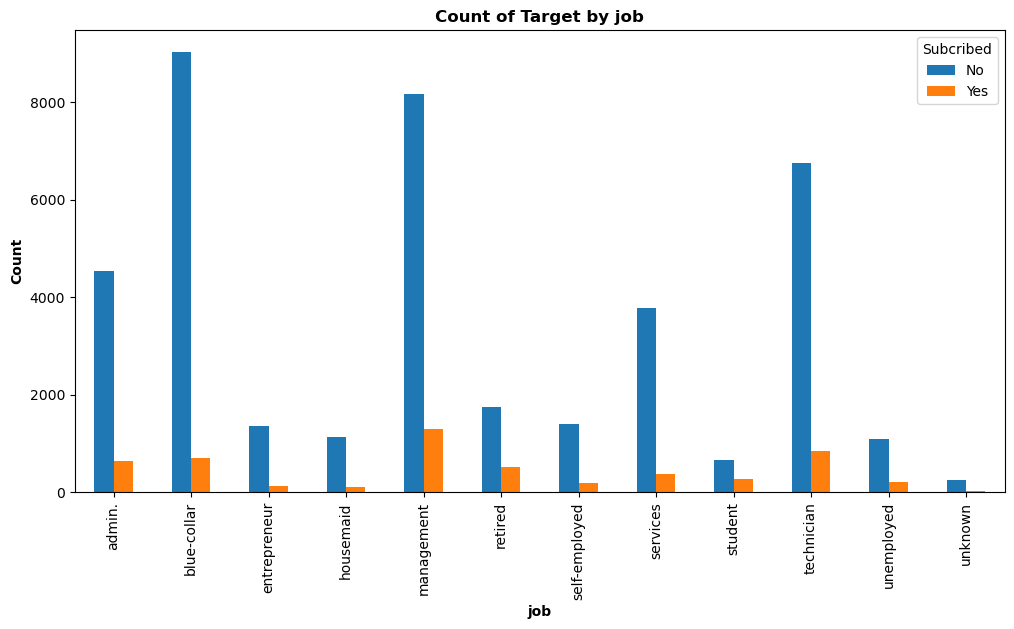

In [43]:
names = ["job","marital","education","default","housing","loan","contact","poutcome", "month"]

def categoricdist(name):
    t = df.groupby([name,"y"]).size().unstack(fill_value=0)
    t.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel(name, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title(f'Count of Target by {name}', fontweight='bold')
    plt.legend(title='Subcribed', labels=['No', 'Yes'])
    plt.show()
    
categoricdist("job")

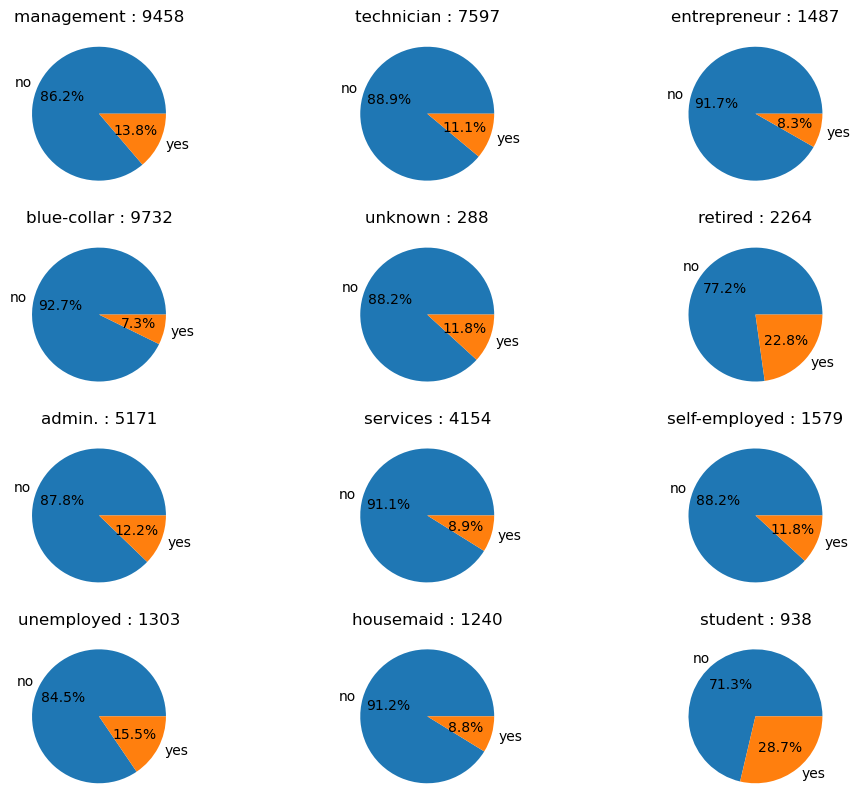

In [37]:
jobs = df["job"].unique()
fig, axes = plt.subplots(4, 3, figsize=(12, 10))
a = 0
b = 0
for i in jobs:
    if b == 3:
        b = 0
        a += 1
    d = df[df["job"] == i]
    job_datas = d.groupby('job')['y'].value_counts()
    axes[a,b].pie(job_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a,b].set_title(f"{i} : {job_datas.sum()}")
    b+=1

## Pénz eloszlások vizsgálata munkacsoportok alapján

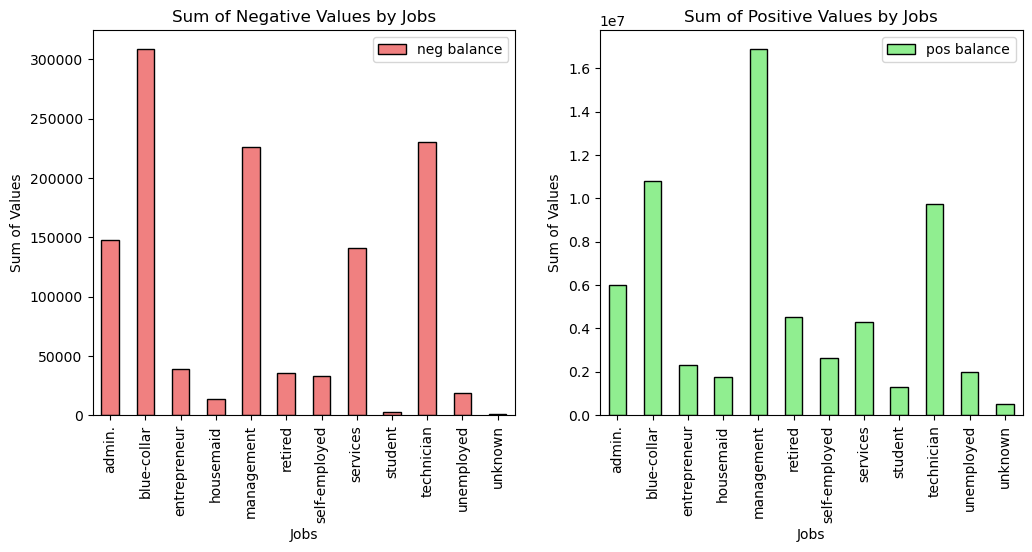

In [115]:
pos_values_df = df[df['balance'] >= 0]
t = pos_values_df.groupby('job')['balance'].sum().abs()
negative_values_df = df[df['balance'] < 0]
z = negative_values_df.groupby('job')['balance'].sum().abs()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

z.plot(kind = "bar", color = "lightcoral", edgecolor = "black", ax = ax1)
ax1.set_title('Sum of Negative Values by Jobs')
ax1.set_xlabel('Jobs')
ax1.set_ylabel('Sum of Values')
ax1.legend(labels=["neg balance"])
t.plot(kind = "bar", color = "lightgreen",edgecolor='black', ax = ax2)
ax2.set_title('Sum of Positive Values by Jobs')
ax2.set_xlabel('Jobs')
ax2.set_ylabel('Sum of Values')
ax2.legend(labels=["pos balance"])

<Axes: >

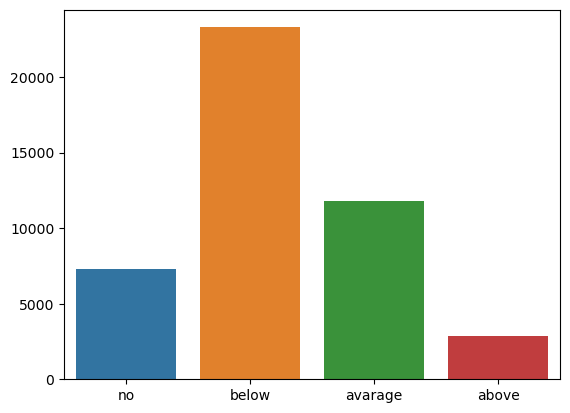

In [45]:
#fig, axes = plt.subplots(2, 2, figsize=(12, 10))

no = df[df["balance"] <= 0]
below = df[(df["balance"] <= 1000) & (df["balance"] > 0)]
avarage = df[(df["balance"] <= 5000) & (df["balance"] > 1000)]
above = df[df["balance"] > 5000]

data = {
    "no" : no["balance"],
    "below" : below["balance"],
    "avarage" : avarage["balance"],
    "above" : above["balance"],
    "y" : df["y"]
}

new_data = pd.DataFrame(data)

labels = ["no","below","avarage","above"]
counts = [new_data["no"].count(),new_data["below"].count(),new_data["avarage"].count(),new_data["above"].count()]
sns.barplot(x = labels, y = counts)

## Megfigyelések

- Az oszlopdiagrammon jól kivehető, hogy a blue-collar, management és a technician munkacsoportok voltak a legtöbbször megkeresve
- Az ismeretlen, diák és munkanélküliek elnyomó kissebbségben voltak, ez arra enged következtetni, hogy a hívások főleg telhetősebb embereket célzott meg. Ez további vizsgálatot követel
- Hiába voltak kissebbségben az utóbbiak a diákok messze a legnagyobb arányban iratkoztak fel, míg a blue-collar osztály volt arányaiba mérve a legkevesebben
- A pénzelemzésnél látszik, hogy a blue-collar, management és a technician osztályok azok akik a legtöbbet keresik, viszont a legnagyobb negatív keresettel is ők rendelkeznek
- Innen következik, hogy a hívások főleg a tehetősebb rétegek felé irányultak

#### A kereseteket 4 részre bontva ezek sorra:
- no: negatív kereset
- below: 0 és 1000 közötti fizetés
- avarage: 1000 és 5000 közötti fizetés
- above: 5000 feletti fizetés

Az felkeresett kliensek jelentős része tartozik a below kategóriába és az avarage kategóriába

## Párkapcsolati státusz vizsgálata

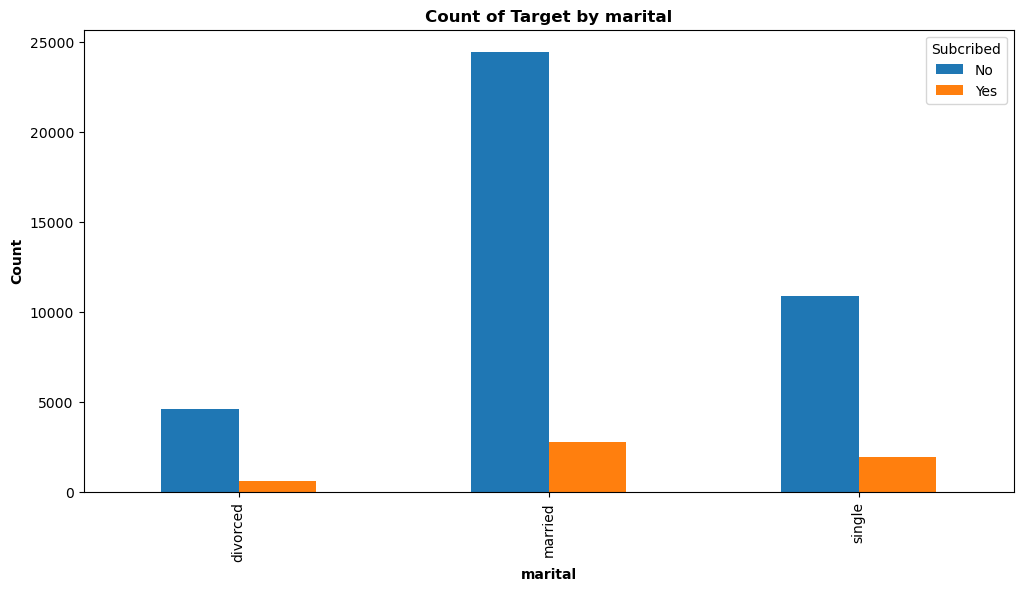

In [44]:
categoricdist("marital")

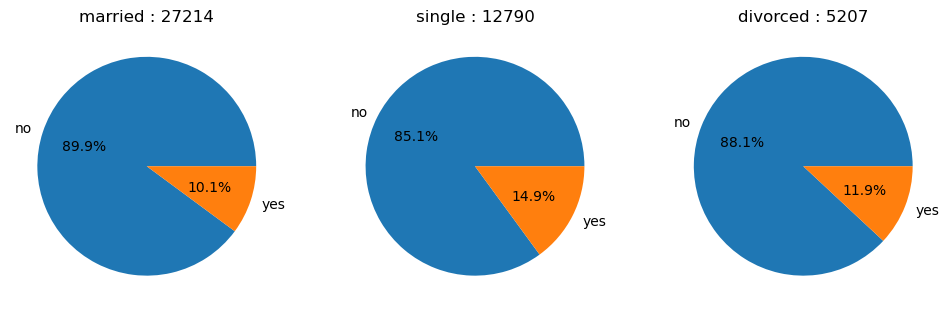

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
marital = df["marital"].unique()
a = 0
for i in marital:
    d = df[df["marital"] == i]
    marital_datas = d.groupby('marital')['y'].value_counts()
    axes[a].pie(marital_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {marital_datas.sum()}")
    a += 1

## Megfigyelések

- Az elvált kliensek voltak elnyomó kissebbségben és arányosan sem ők a legtöbben feliratkozottak
- A megkérdezett emberek 54%-a házas viszont az egyedülállók arányaiba mérve többen iratkoztak fel

## Az oktatottság vizsgálata

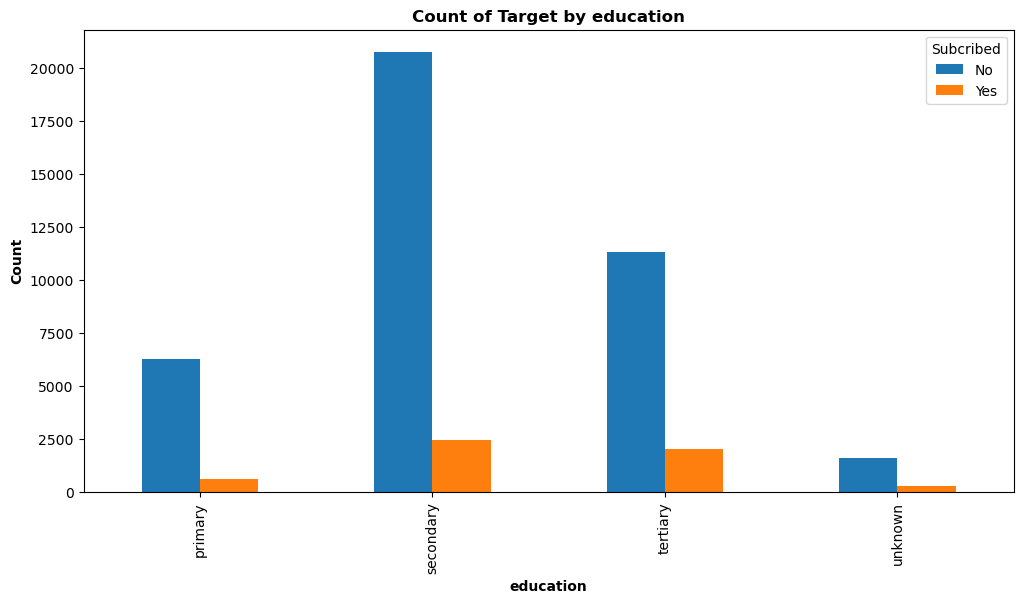

In [50]:
categoricdist("education")

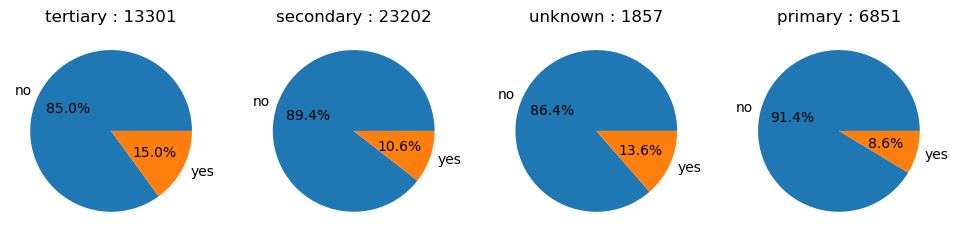

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(12, 10))
education = df["education"].unique()
a = 0
for i in education:
    d = df[df["education"] == i]
    education_datas = d.groupby('education')['y'].value_counts()
    axes[a].pie(education_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {education_datas.sum()}")
    a += 1

## Megfigyelések

- A kliensek legnagyobb százaléka magasan képzett
- Arányokat nézve is a magasan képzettek a kiemelkedőbb
- Az adatsorban a feliratkozott alacsonyan képzett emberek alig 2%-ot tesznek ki

## A lakáshitelesek eloszlásának vizsgálata

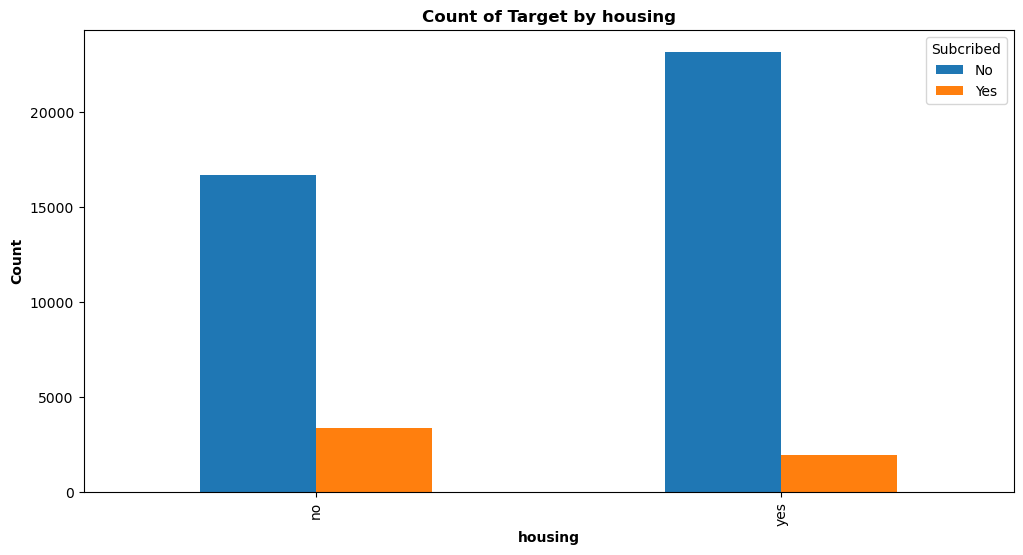

In [54]:
categoricdist("housing")

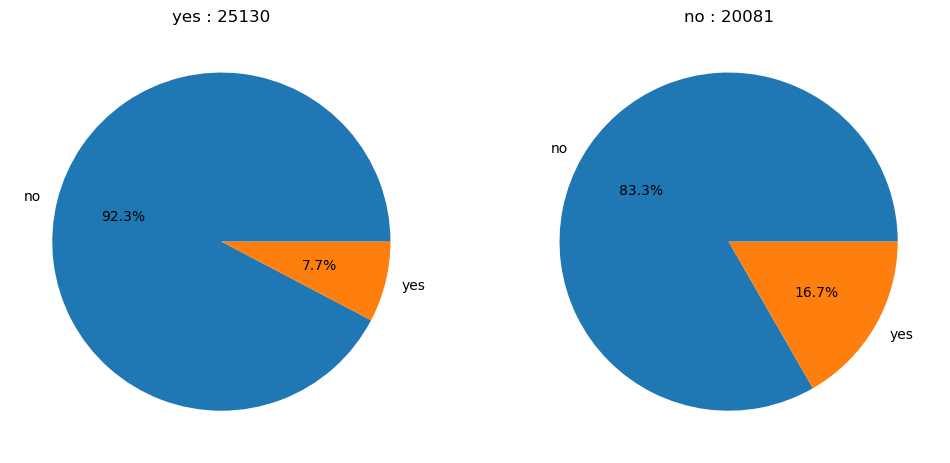

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
housing = df["housing"].unique()
a = 0
for i in housing:
    d = df[df["housing"] == i]
    housing_datas = d.groupby('housing')['y'].value_counts()
    axes[a].pie(housing_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {housing_datas.sum()}")
    a += 1

## Megfigyelések

- 5000-el több olyan ember volt akinek van lakáshiteli mint akinek nincs
- Több mint 2x akkora arányban iratkozatk fel azok akiknek nincs mint akiknek van lakáshitele

## Személyi kölcsön eloszlásának vizsgálata

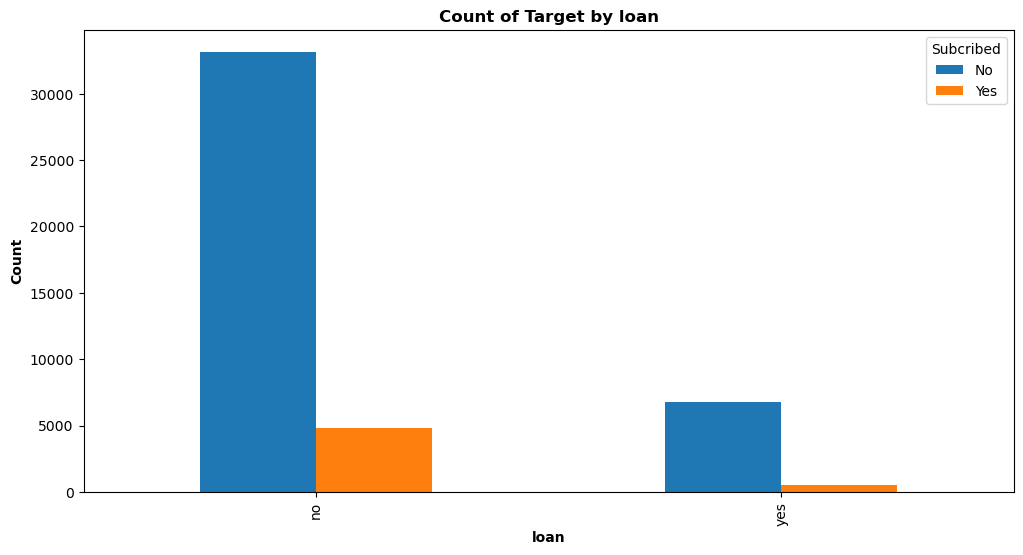

In [57]:
categoricdist("loan")

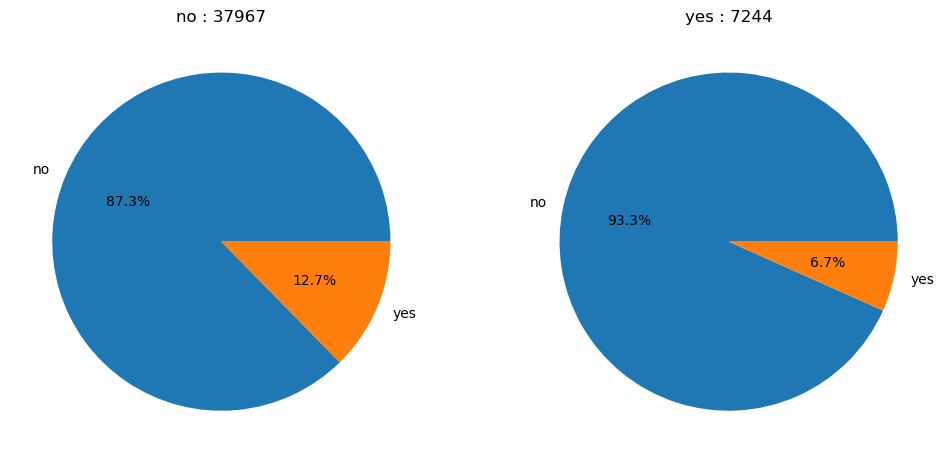

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
loan = df["loan"].unique()
a = 0
for i in loan:
    d = df[df["loan"] == i]
    loan_datas = d.groupby('loan')['y'].value_counts()
    axes[a].pie(loan_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {loan_datas.sum()}")
    a += 1

## Megfigyelések

- A 45k megkérdezett emberből több mint 80%-ának nincs személyi kölcsöne
- A személyi kölcsönösönnel nem rendelkezők 12.7%-a míg az azzal rendelkezők 6.7%-a iratkozott fel

## Hívásforma eloszlásának vizsgálata

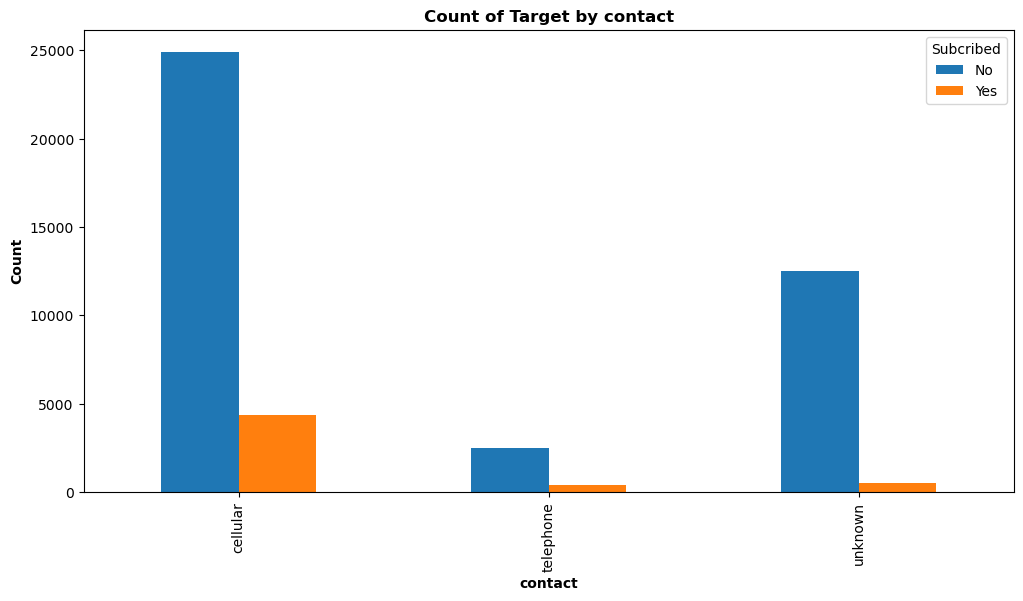

In [59]:
categoricdist("contact")

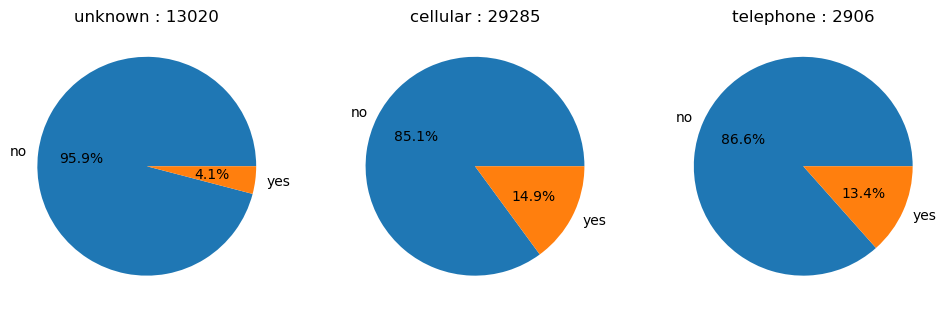

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
contact = df["contact"].unique()
a = 0
for i in contact:
    d = df[df["contact"] == i]
    contact_datas = d.groupby('contact')['y'].value_counts()
    axes[a].pie(contact_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {contact_datas.sum()}")
    a += 1

## Megfigyelések

- A cellular kategóriába eső kliensek kiemelkedően sokan voltak
- A telephone kategóriába eső kliensek voltak a legkevesebben, 10x kevesebben voltak mint a cellular kategóriások
- Arányaiba mérve az ismeretlenek iratkoztak fel a legkevesebben

## Az előző kampány kimenetelének vizsgálata

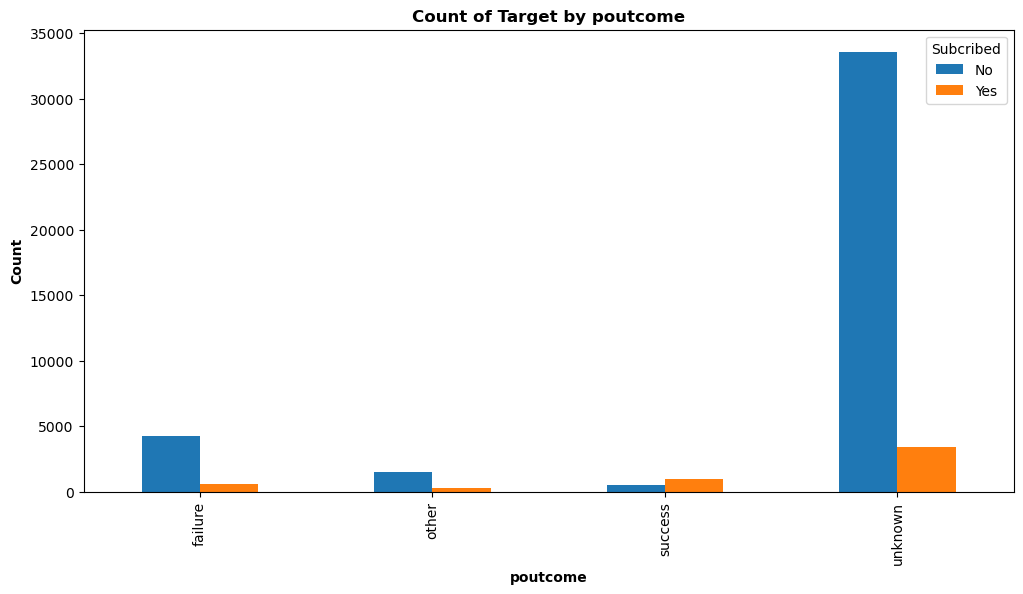

In [61]:
categoricdist("poutcome")

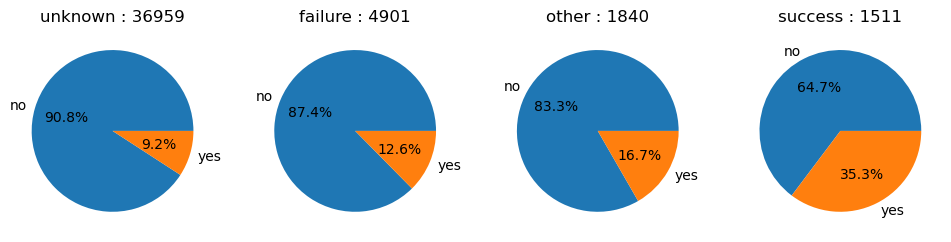

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(12, 10))
poutcome = df["poutcome"].unique()
a = 0
for i in poutcome:
    d = df[df["poutcome"] == i]
    poutcome_datas = d.groupby('poutcome')['y'].value_counts()
    axes[a].pie(poutcome_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {poutcome_datas.sum()}")
    a += 1

## Megfigyelések

- A bank valószínűleg egy marketing stratégia váltás miatt más klienscsoportot céloz ez onnan követkertethető, hogy az ismeretlen osztály kiemelkedő volt
- Akinék ez a kampány múltkor is feliratkozással végződött annak nagy része lojális maradt

## Hónapok eloszlásának vizsgálata

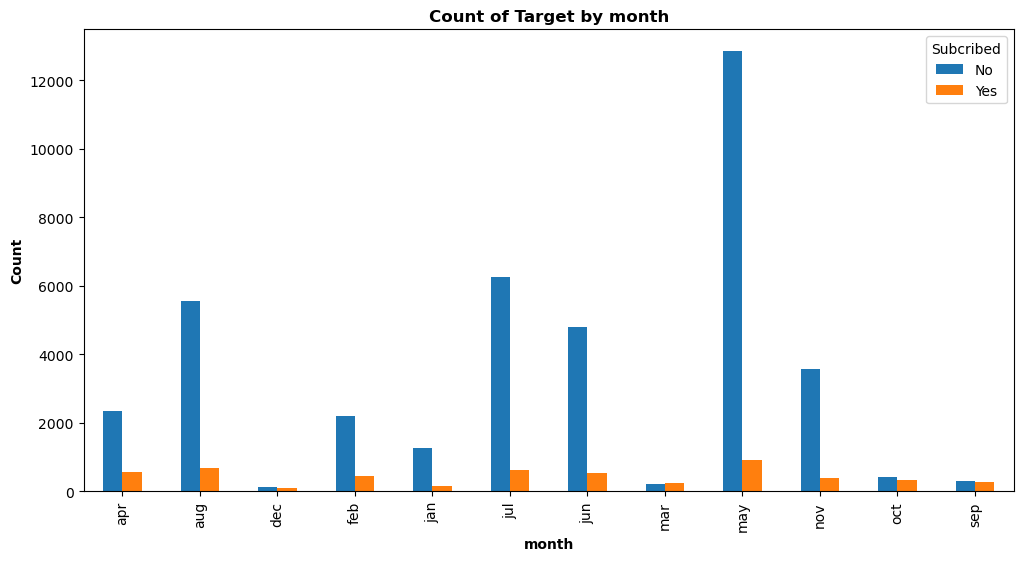

In [63]:
categoricdist("month")

In [67]:
month = df["month"].unique()

winmonth = df[df["y"] == "yes"]

Text(0.5, 1.0, 'Subscriptions by month')

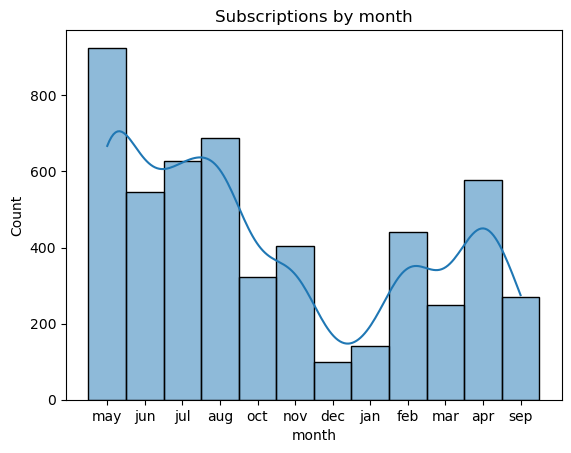

In [75]:
sns.histplot(data = winmonth["month"], kde = True)
plt.title("Subscriptions by month")

## Megfigyelések

- A legtöbb telefonhívás májusban történt, ezzel együtt az is kivehető, hogy május volt a legsikeresebb hónap feliratkozások szempontjából
- Decemberben feltehetően az ünnepek miatt nem kezdeményeztek annyi hívást
- A többi hónap nagyjából elaránylik kivéve a nyári hónapok akkor jelentősen többen iratkoztak fel

## EDA Eredményei

- Május volt a legkiemelkedőbb hónap feliratkozások szempontjából
- A bank feltehetőleg marketing stratégiát váltott, az adatsorból a múltkori adatok nem derülnek ki, így összehasonlításra nincs lehetőség
- Akik múktkor is feliratkoztak azok nagy része most is feliratkozott
- Érdemesebb a kölcsönökkel nem rendelkezőket célozni mivel ők többen iratkoztak fel
- A magasabb iskolázottsággal rendelkezők is többen iratkoztak fel
- Érdemes lehet az időseket jobban megcélozni hiszen ők is nagy arányokba iratkoztak fel
- Egy klienst 8 hívás után érdemes feladni, további kliensek elérése kifizetődőbb lehet

## Adattisztítás

In [116]:
#Data cleaning

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from IPython.display import Image, display

cdf = df.copy()

label_encoder = LabelEncoder()
scaler = StandardScaler()

for column in df.columns:
    if cdf[column].dtypes == "object" and column != "y":
        cdf[column] = label_encoder.fit_transform(cdf[column])
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        print(mapping)
    if column != "y" and cdf[column].dtypes == "int64":
        cdf[column] = scaler.fit_transform(np.array(cdf[column]).reshape(-1, 1))
        
names = cdf.columns
X = cdf[names[1:-1]].values
y = cdf["y"].values
cdf

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'divorced': 0, 'married': 1, 'single': 2}
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'cellular': 0, 'telephone': 1, 'unknown': 2}
{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


age  job  marital  education  default   balance  housing  loan  \
0      1.606965    4        1          2        0  0.256419        1     0   
1      0.288529    9        2          1        0 -0.437895        1     0   
2     -0.747384    2        1          1        0 -0.446762        1     1   
3      0.571051    1        1          3        0  0.047205        1     0   
4     -0.747384   11        2          3        0 -0.447091        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
45206  0.947747    9        1          2        0 -0.176460        0     0   
45207  2.831227    5        0          0        0  0.120447        0     0   
45208  2.925401    5        1          1        0  1.429593        0     0   
45209  1.512791    1        1          1        0 -0.228024        0     0   
45210 -0.370689    2        1          1        0  0.528364        0     0   

       contact       day  month  duration  campaign     pdays  previous  \
0            2 -1.298476      8  0.011016 -0.569351 -0.411453 -0.251940   
1            2 -1.298476      8 -0.416127 -0.569351 -0.411453 -0.251940   
2            2 -1.298476      8 -0.707361 -0.569351 -0.411453 -0.251940   
3            2 -1.298476      8 -0.645231 -0.569351 -0.411453 -0.251940   
4            2 -1.298476      8 -0.233620 -0.569351 -0.411453 -0.251940   
...        ...       ...    ...       ...       ...       ...       ...   
45206        0  0.143418      9  2.791329  0.076230 -0.411453 -0.251940   
45207        0  0.143418      9  0.768224 -0.246560 -0.411453 -0.251940   
45208        0  0.143418      9  3.373797  0.721811  1.436189  1.050473   
45209        1  0.143418      9  0.970146  0.399020 -0.411453 -0.251940   
45210        0  0.143418      9  0.399328 -0.246560  1.476138  4.523577   

       poutcome    y  
0             3   no  
1             3   no  
2             3   no  
3             3   no  
4             3   no  
...         ...  ...  
45206         3  yes  
45207         3  yes  
45208         2  yes  
45209         3   no  
45210         1   no  

[45211 rows x 17 columns]

## Unsupervised Learning

## PCA

<Axes: >

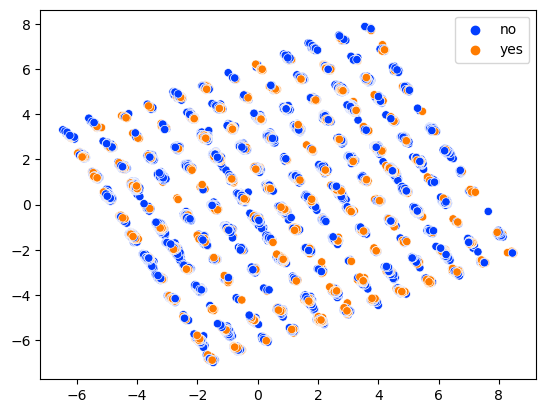

In [87]:
pca = PCA(n_components=2, random_state=42)
X_transformed = pca.fit_transform(X)

sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette="bright")

## TSN-E

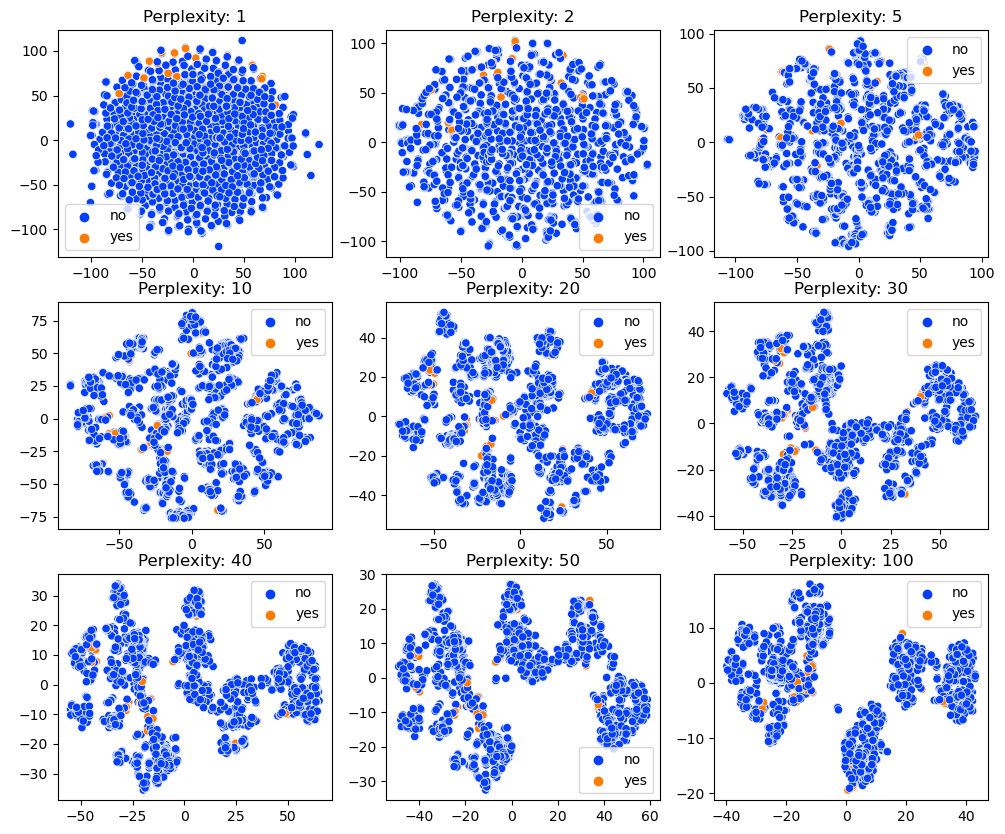

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

a = 0
b = 0

for perplexity in [1, 2, 5, 10, 20, 30, 40, 50, 100]:
    
    if b == 3:
        b = 0
        a += 1

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_transformed_tsne = tsne.fit_transform(X[:2000])
    
    sns.scatterplot(x=X_transformed_tsne[:, 0], y=X_transformed_tsne[:, 1], hue=y[:2000], palette="bright", ax = axes[a,b])
    axes[a,b].set_title(f"Perplexity: {perplexity}")
    b+= 1

## UMAP

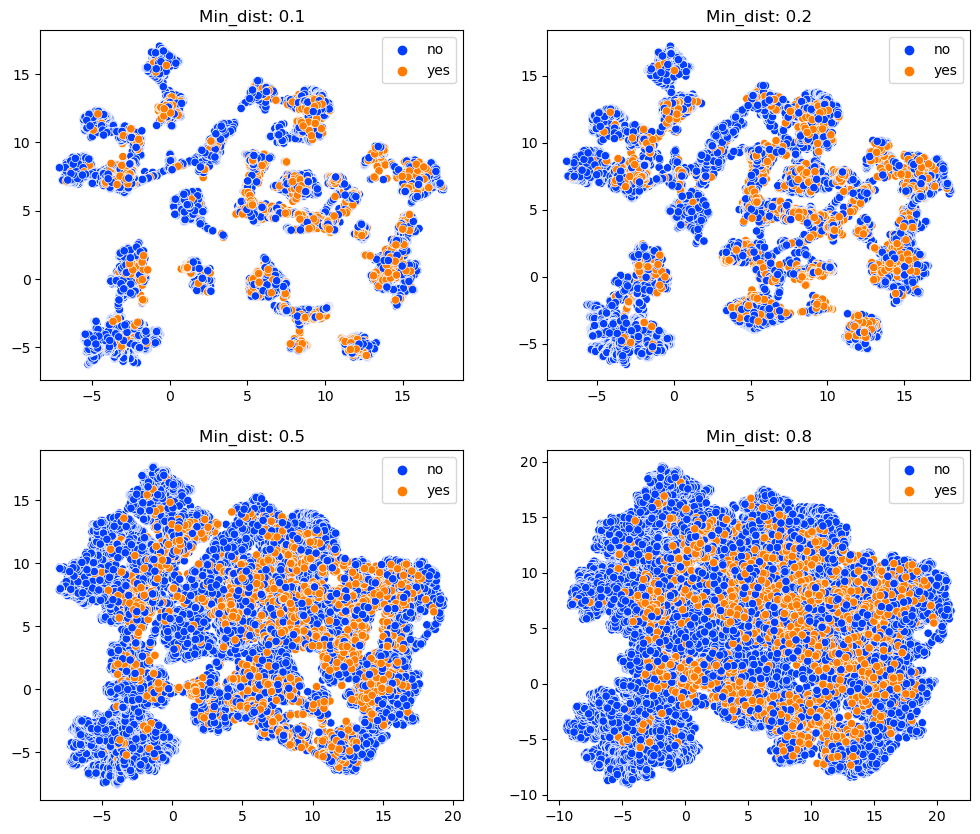

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

a = 0
b = 0

for min_dist in [0.1,0.2,0.5,0.8]:
    
    if b == 2:
        b = 0
        a += 1
    
    umap = UMAP(n_components=2, random_state=42, min_dist=min_dist)
    X_transformed_umap = umap.fit_transform(X)
    sns.scatterplot(x=X_transformed_umap[:, 0], y=X_transformed_umap[:, 1], hue=y, palette="bright", ax = axes[a,b])
    axes[a,b].set_title(f"Min_dist: {min_dist}")
    b += 1

## K-Means

Text(0.5, 1.0, 'Real labels')

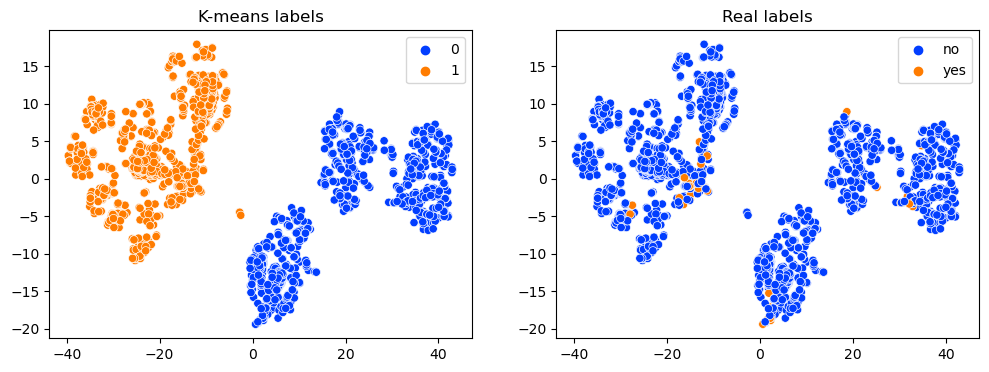

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

km = KMeans(n_clusters=2, n_init="auto", random_state=42)

tsne = TSNE(n_components=2, perplexity = 100, random_state=42)
X_transformed_tsne = tsne.fit_transform(X[:2000])

km.fit(X_transformed_tsne)

sns.scatterplot(x=X_transformed_tsne[:, 0], y=X_transformed_tsne[:, 1], hue=km.labels_, palette="bright", ax = axes[0])
axes[0].set_title("K-means labels")
sns.scatterplot(x=X_transformed_tsne[:, 0], y=X_transformed_tsne[:, 1], hue=y[:2000], palette="bright", ax = axes[1])
axes[1].set_title("Real labels")

## Silhouette score

Text(0.5, 1.0, 'Silhouette scores')

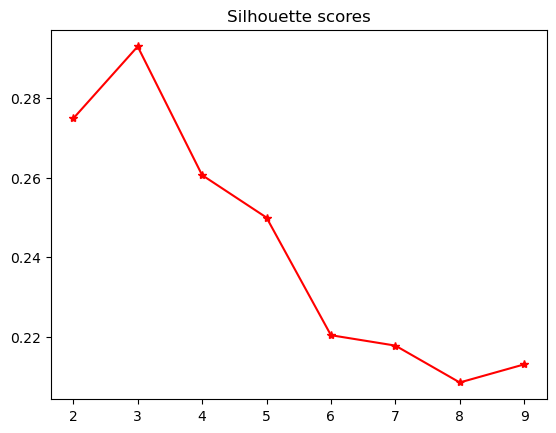

In [106]:
scores = [] 
for K in range(2, 10):
    km = KMeans(n_clusters=K, random_state=44, n_init="auto")
    km.fit(X)

    score = silhouette_score(X, km.labels_)
    scores.append(score)

plt.plot(range(2, 10), scores, "r-*")
plt.title("Silhouette scores")

## Tanításra felkészítés

In [110]:
cdf

age  job  marital  education  default   balance  housing  loan  \
0      1.606965    4        1          2        0  0.256419        1     0   
1      0.288529    9        2          1        0 -0.437895        1     0   
2     -0.747384    2        1          1        0 -0.446762        1     1   
3      0.571051    1        1          3        0  0.047205        1     0   
4     -0.747384   11        2          3        0 -0.447091        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
45206  0.947747    9        1          2        0 -0.176460        0     0   
45207  2.831227    5        0          0        0  0.120447        0     0   
45208  2.925401    5        1          1        0  1.429593        0     0   
45209  1.512791    1        1          1        0 -0.228024        0     0   
45210 -0.370689    2        1          1        0  0.528364        0     0   

       contact       day  month  duration  campaign     pdays  previous  \
0            2 -1.298476      8  0.011016 -0.569351 -0.411453 -0.251940   
1            2 -1.298476      8 -0.416127 -0.569351 -0.411453 -0.251940   
2            2 -1.298476      8 -0.707361 -0.569351 -0.411453 -0.251940   
3            2 -1.298476      8 -0.645231 -0.569351 -0.411453 -0.251940   
4            2 -1.298476      8 -0.233620 -0.569351 -0.411453 -0.251940   
...        ...       ...    ...       ...       ...       ...       ...   
45206        0  0.143418      9  2.791329  0.076230 -0.411453 -0.251940   
45207        0  0.143418      9  0.768224 -0.246560 -0.411453 -0.251940   
45208        0  0.143418      9  3.373797  0.721811  1.436189  1.050473   
45209        1  0.143418      9  0.970146  0.399020 -0.411453 -0.251940   
45210        0  0.143418      9  0.399328 -0.246560  1.476138  4.523577   

       poutcome    y  
0             3   no  
1             3   no  
2             3   no  
3             3   no  
4             3   no  
...         ...  ...  
45206         3  yes  
45207         3  yes  
45208         2  yes  
45209         3   no  
45210         1   no  

[45211 rows x 17 columns]

## Megfelelő metrikák megválasztása

Kiegyensúlyozatlan adatsorral dolgozunk vigyázni kell milyen metrikák alapján választunk modellt.Fontos kérdés lehet, hogy mi a fontosabb, több feliratkozót vagy több nem feliratkozót találjon el. Ezek mind más más metrikákkal számolandók. Ezeket most áttekintjük.

## Classifikációs metrikák

### Accuracy

\begin{equation}
\frac{TP + TN}{P + N}
\end{equation}

Kiegyensúlyozott adatsornál kiváló modellkiértékelő azonban a jelenlegi adatsoron nem megbízható. E probláma kiküszöbölésére az alábbi metrikát használjuk
### Balanced Accuracy

\begin{equation}
\frac{TPR + TNR}{2}
\end{equation}

### Recall

\begin{equation}
\frac{TP}{P}
\end{equation}

Ezzel a metrikával mérendő az eltalált pozitív értékek aránya

### Specificity

\begin{equation}
\frac{TN}{N}
\end{equation}

Ezzel a metrikával mérendő az eltalált negatív értékek aránya

### F1 score

\begin{equation}
\frac{2TP}{2TP + FP + FN}
\end{equation}

### AUC score

Az AUC a ROC görbe alatti területtel dönti el melyik modell a jobb, ez a metrika hibátlanul működik kiegyensúlyozatlan adatsoron

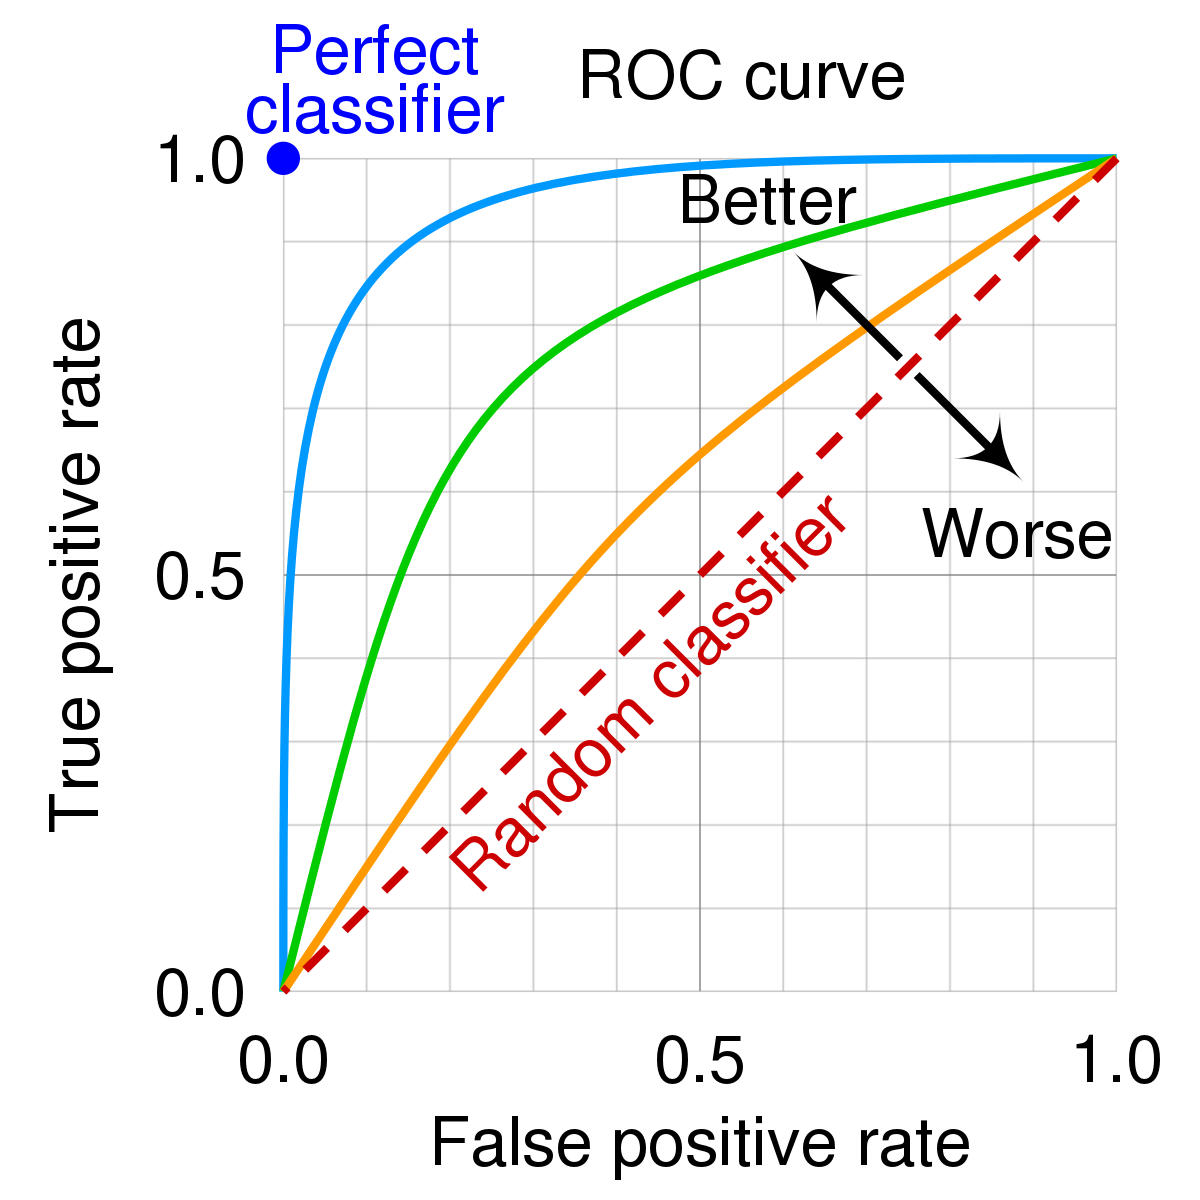

In [118]:
display(Image('roc.png', width=300))
#https://medium.com/@ilyurek/roc-curve-and-auc-evaluating-model-performance-c2178008b02

## Importok és modellkiértékelő metódusok

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, classification_report
from copy import deepcopy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, balanced_accuracy_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

def model_eval(model):

    errors = []
    performance = []
        
    model.fit(X_tr,y_tr)

    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    acc_tr = accuracy_score(y_tr, y_pred_tr)
    acc_te = accuracy_score(y_te, y_pred_te)

    y_pred_proba_tr = model.predict_proba(X_tr)
    y_pred_proba_te = model.predict_proba(X_te)

    logloss_tr = log_loss(y_tr, y_pred_proba_tr)
    logloss_te = log_loss(y_te, y_pred_proba_te)
    
    balanced_acc_tr = balanced_accuracy_score(y_tr, y_pred_tr)
    balanced_acc_te = balanced_accuracy_score(y_te, y_pred_te)
    
    auc_tr = roc_auc_score(np.where(y_tr == "no",0,1),y_pred_proba_tr[:,1])
    auc_te = roc_auc_score(np.where(y_te == "no",0,1),y_pred_proba_te[:,1])
    
    errors.append([acc_tr,acc_te,logloss_tr,logloss_te,balanced_acc_tr, balanced_acc_te,auc_tr,auc_te])
        
    performance.append(np.array(errors).mean(axis = 0))
    return np.array(performance)

def model_evaluate(model):

    errors = []
    performance = []
        
    model.fit(X_tr,y_tr)

    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    acc_tr = accuracy_score(y_tr, y_pred_tr)
    acc_te = accuracy_score(y_te, y_pred_te)

    y_pred_proba_tr = model.predict_proba(X_tr)
    y_pred_proba_te = model.predict_proba(X_te)

    logloss_tr = log_loss(y_tr, y_pred_proba_tr)
    logloss_te = log_loss(y_te, y_pred_proba_te)
    
    balanced_acc_tr = balanced_accuracy_score(y_tr, y_pred_tr)
    balanced_acc_te = balanced_accuracy_score(y_te, y_pred_te)
    
    target_names = ["no","yes"]
    classification_report(y_te, y_pred_te, target_names=target_names)
    
    auc_tr = roc_auc_score(np.where(y_tr == "no",0,1),y_pred_proba_tr[:,1])
    auc_te = roc_auc_score(np.where(y_te == "no",0,1),y_pred_proba_te[:,1])

    errors.append([acc_tr,acc_te,logloss_tr,logloss_te])
        
    performance.append(np.array(errors).mean(axis = 0))
    ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred_te), display_labels=["no", "yes"]).plot()
    plt.title("Confusion matrix")
    plt.show()
    print(y_te.shape, y_pred_proba_te.shape)
    fpr, tpr, thresholds = roc_curve(np.where(y_te == "no",0,1), y_pred_proba_te[:,1])
    plt.plot(fpr, tpr)
    plt.title("Roc curvature")
    plt.xlabel(f"AUC: {auc_te}")
    plt.show()
    return np.array(performance)

## Hyperparaméterek keresése

## Logisztikus Regresszió

Egyik legfontosabb hypermaraméterén fogunk finomhangolni (C)

(29, 1, 8)


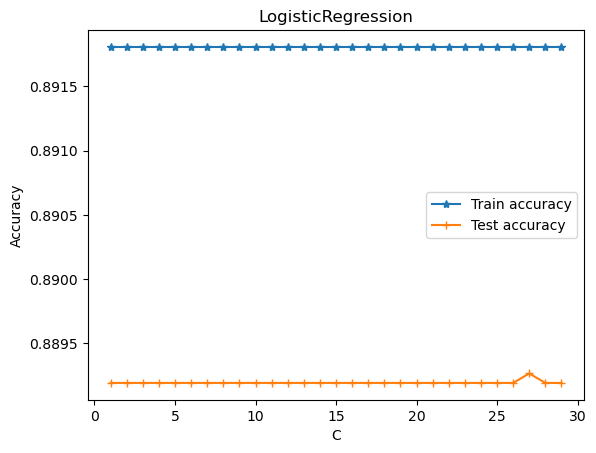

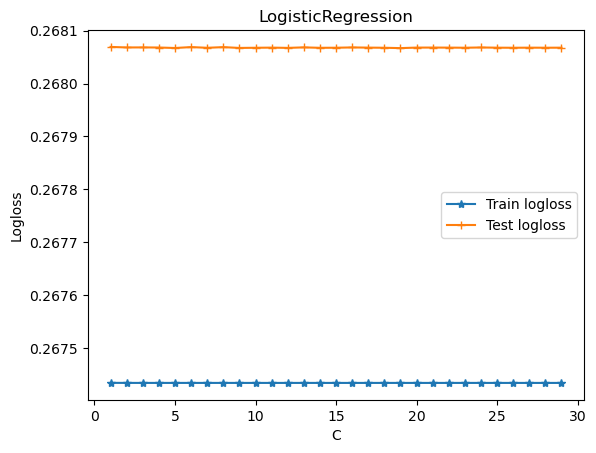

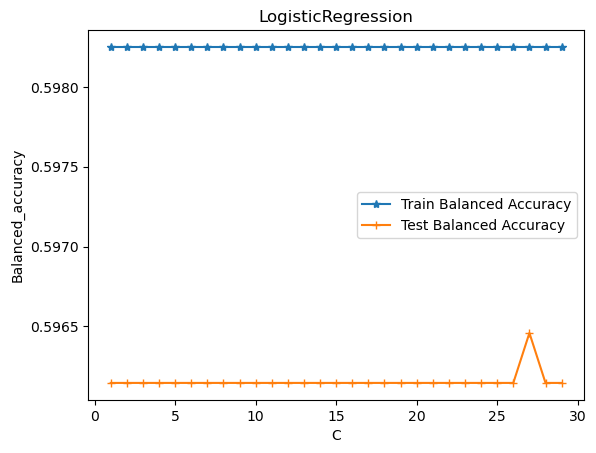

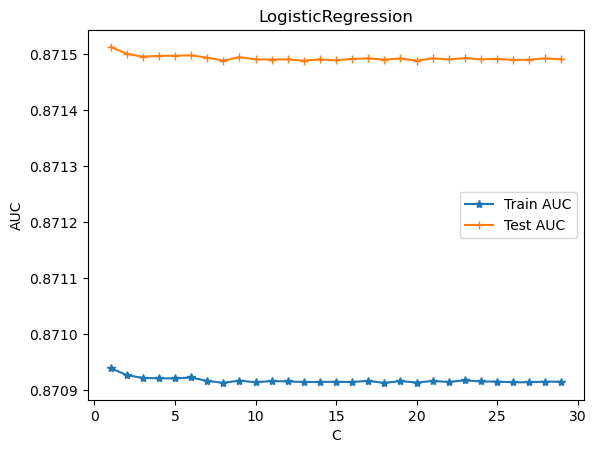

In [232]:
models = []
diff = np.arange(1,30,1)

for i in diff:
    
    model = LogisticRegression(C = i)
    models.append(model_eval(model))
    
models = np.array(models)
print(models.shape)
plt.plot(diff,models[:,:,0], "*-")    
plt.plot(diff,models[:,:,1], "+-")
plt.legend(labels = ["Train accuracy","Test accuracy"])
plt.title("LogisticRegression")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.show()
plt.plot(diff,models[:,:,2], "*-")   
plt.plot(diff,models[:,:,3], "+-")   
plt.legend(labels = ["Train logloss","Test logloss"])
plt.title("LogisticRegression")
plt.ylabel("Logloss")
plt.xlabel("C")
plt.show()
plt.plot(diff,models[:,:,4], "*-")   
plt.plot(diff,models[:,:,5], "+-")   
plt.legend(labels = ["Train Balanced Accuracy","Test Balanced Accuracy"])
plt.title("LogisticRegression")
plt.ylabel("Balanced_accuracy")
plt.xlabel("C")
plt.show()
plt.plot(diff,models[:,:,6], "*-")   
plt.plot(diff,models[:,:,7], "+-")   
plt.legend(labels = ["Train AUC","Test AUC"])
plt.title("LogisticRegression")
plt.ylabel("AUC")
plt.xlabel("C")
plt.show()

C paramétert az alapraértelmezetten hagyjuk hiszen nem érzékeny a metrikákra

## DecisionTreeClassifier

max_depth finomhangolás

(14, 1, 8)


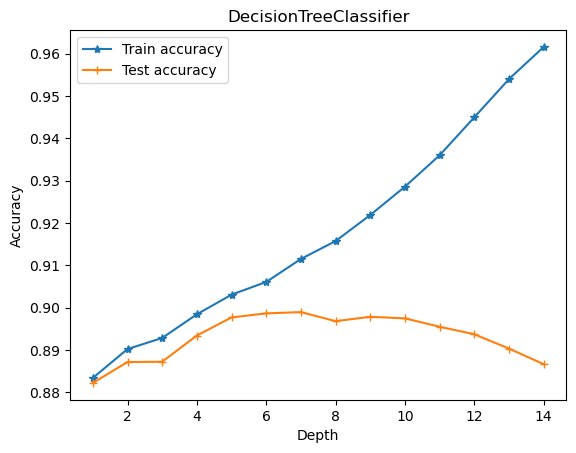

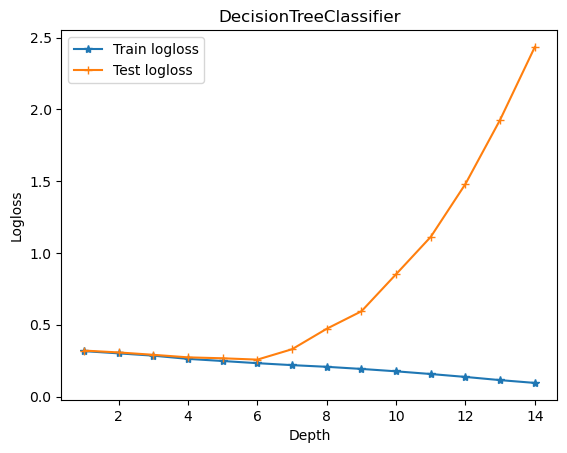

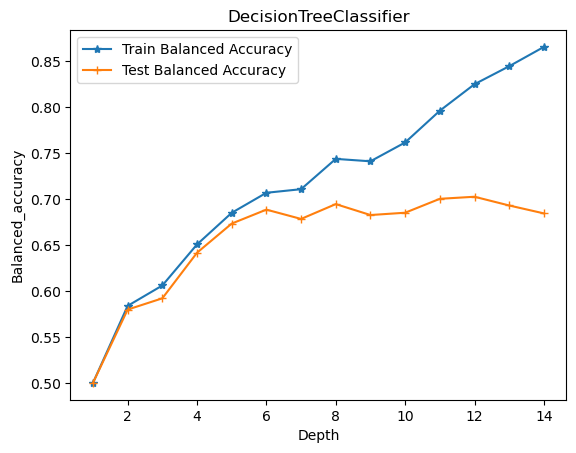

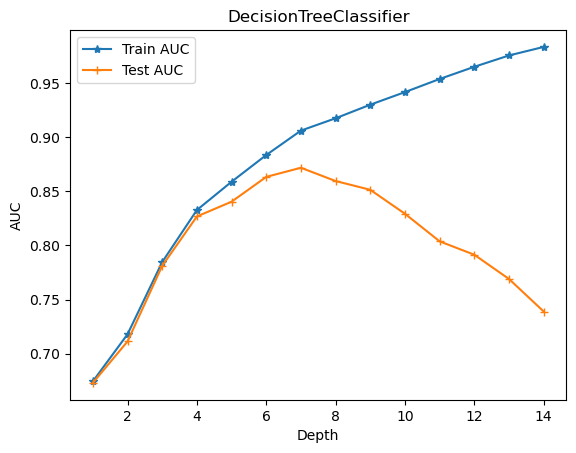

In [227]:
models = []
diff = np.arange(1,15,1)

for i in diff:
    
    model = DecisionTreeClassifier(max_depth = i)
    models.append(model_eval(model))
    
models = np.array(models)
print(models.shape)
plt.plot(diff,models[:,:,0], "*-")    
plt.plot(diff,models[:,:,1], "+-")
plt.legend(labels = ["Train accuracy","Test accuracy"])
plt.title("DecisionTreeClassifier")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,2], "*-")   
plt.plot(diff,models[:,:,3], "+-")   
plt.legend(labels = ["Train logloss","Test logloss"])
plt.title("DecisionTreeClassifier")
plt.ylabel("Logloss")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,4], "*-")   
plt.plot(diff,models[:,:,5], "+-")   
plt.legend(labels = ["Train Balanced Accuracy","Test Balanced Accuracy"])
plt.title("DecisionTreeClassifier")
plt.ylabel("Balanced_accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,6], "*-")   
plt.plot(diff,models[:,:,7], "+-")   
plt.legend(labels = ["Train AUC","Test AUC"])
plt.title("DecisionTreeClassifier")
plt.ylabel("AUC")
plt.xlabel("Depth")
plt.show()

max_depth = 7 lesz az optimális hyperparaméter

## RandomForestClassifier

max_depth paraméter finomhangolás

(14, 1, 8)


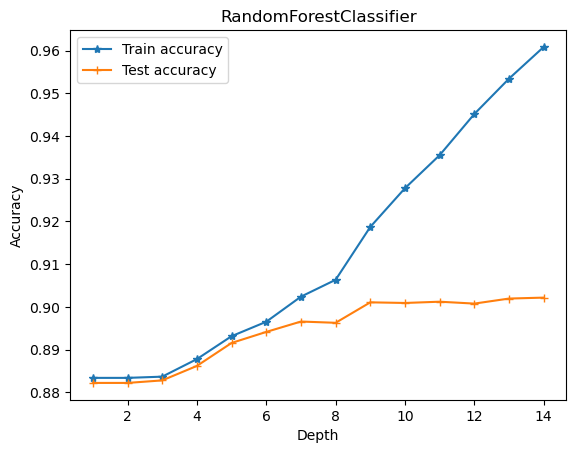

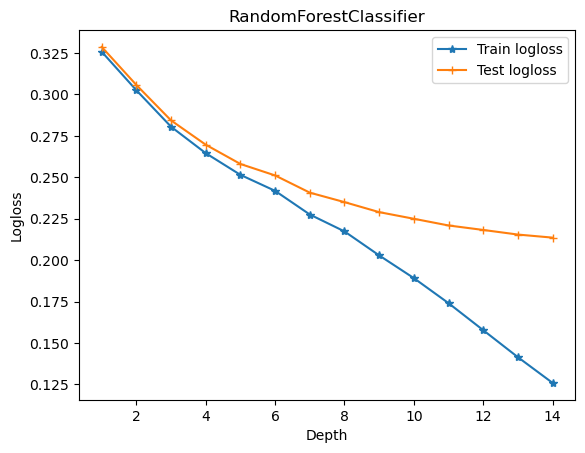

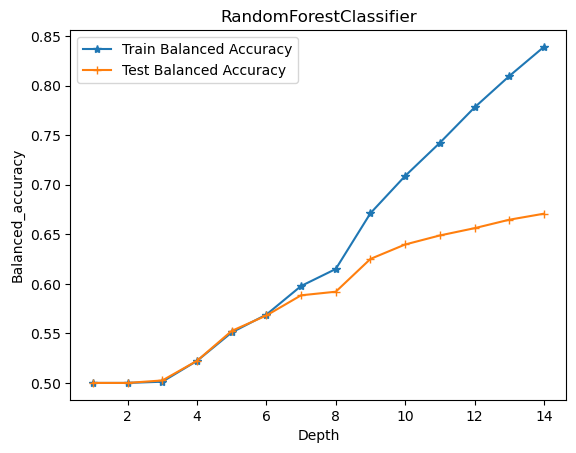

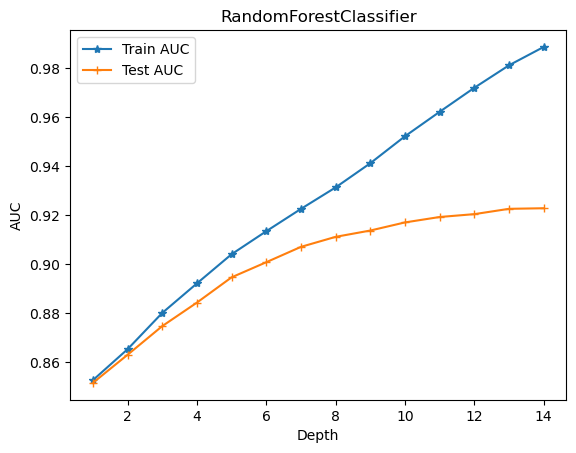

In [228]:
models = []
diff = np.arange(1,15,1)

for i in diff:
    
    model = RandomForestClassifier(max_depth = i)
    models.append(model_eval(model))
    
models = np.array(models)
print(models.shape)
plt.plot(diff,models[:,:,0], "*-")    
plt.plot(diff,models[:,:,1], "+-")
plt.legend(labels = ["Train accuracy","Test accuracy"])
plt.title("RandomForestClassifier")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,2], "*-")   
plt.plot(diff,models[:,:,3], "+-")   
plt.legend(labels = ["Train logloss","Test logloss"])
plt.title("RandomForestClassifier")
plt.ylabel("Logloss")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,4], "*-")   
plt.plot(diff,models[:,:,5], "+-")   
plt.legend(labels = ["Train Balanced Accuracy","Test Balanced Accuracy"])
plt.title("RandomForestClassifier")
plt.ylabel("Balanced_accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,6], "*-")   
plt.plot(diff,models[:,:,7], "+-")   
plt.legend(labels = ["Train AUC","Test AUC"])
plt.title("RandomForestClassifier")
plt.ylabel("AUC")
plt.xlabel("Depth")
plt.show()

max_depth = 10 lesz az optimális hyperparaméter

## GradientBoostingClassifier

max_depth körüli optimalizálás

(14, 1, 8)


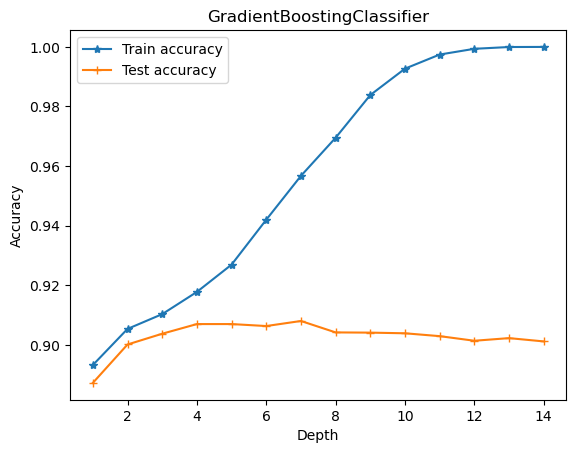

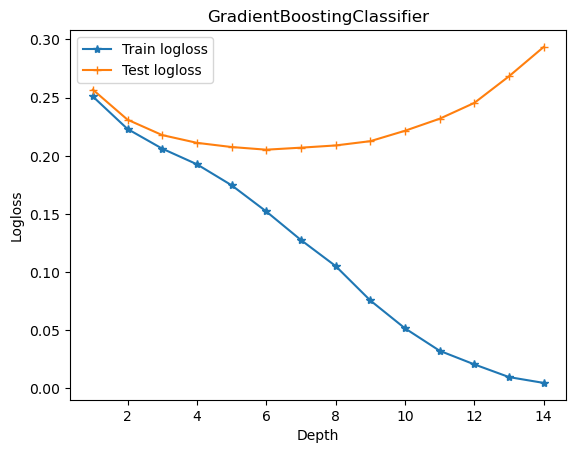

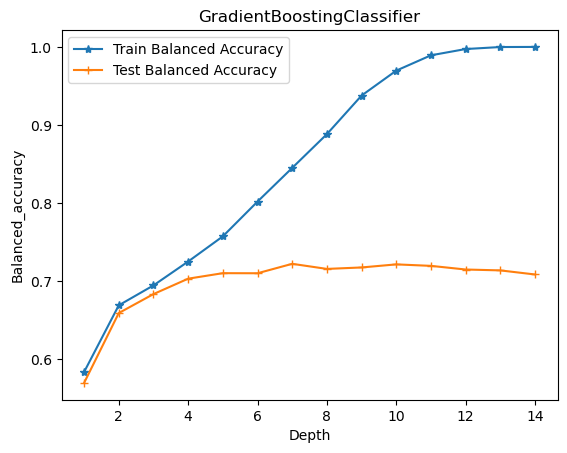

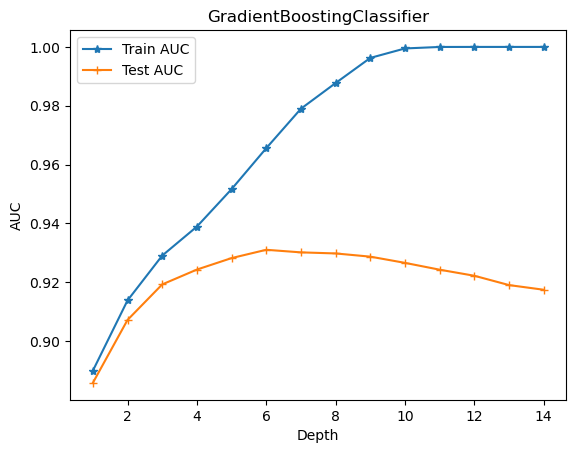

In [230]:
models = []
diff = np.arange(1,15,1)

for i in diff:
    
    model = GradientBoostingClassifier(max_depth = i)
    models.append(model_eval(model))
    
models = np.array(models)
print(models.shape)
plt.plot(diff,models[:,:,0], "*-")    
plt.plot(diff,models[:,:,1], "+-")
plt.legend(labels = ["Train accuracy","Test accuracy"])
plt.title("GradientBoostingClassifier")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,2], "*-")   
plt.plot(diff,models[:,:,3], "+-")   
plt.legend(labels = ["Train logloss","Test logloss"])
plt.title("GradientBoostingClassifier")
plt.ylabel("Logloss")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,4], "*-")   
plt.plot(diff,models[:,:,5], "+-")   
plt.legend(labels = ["Train Balanced Accuracy","Test Balanced Accuracy"])
plt.title("GradientBoostingClassifier")
plt.ylabel("Balanced_accuracy")
plt.xlabel("Depth")
plt.show()
plt.plot(diff,models[:,:,6], "*-")   
plt.plot(diff,models[:,:,7], "+-")   
plt.legend(labels = ["Train AUC","Test AUC"])
plt.title("GradientBoostingClassifier")
plt.ylabel("AUC")
plt.xlabel("Depth")
plt.show()

max_depth = 6 az optimális hyperparaméter

## Neurális Háló (MLPClassifier)

hidden_layer_sizes hyperparaméter optimalizálás

(4, 1, 8)


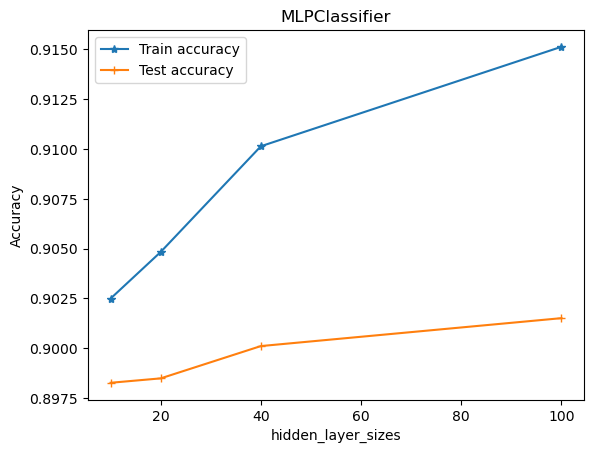

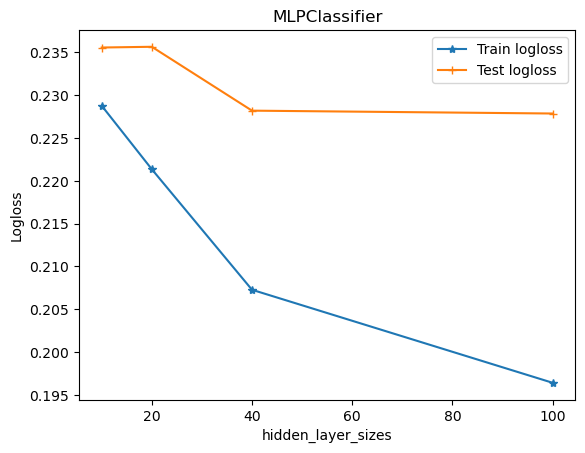

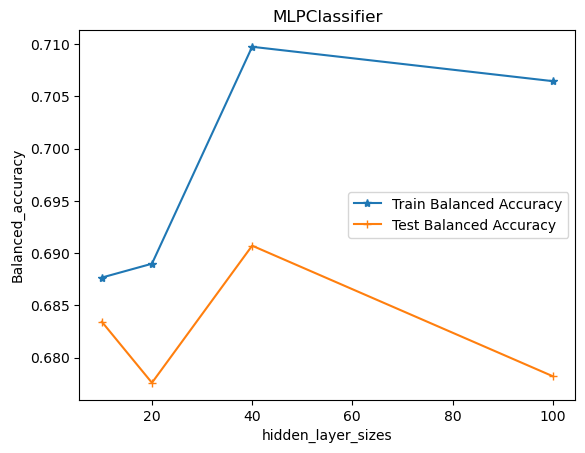

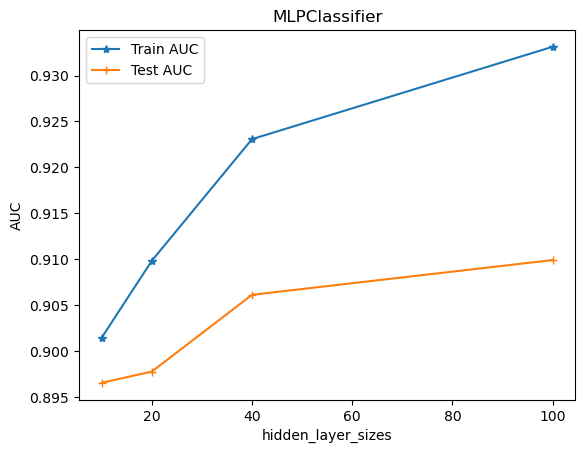

In [233]:
models = []
diff = [10, 20, 40, 100]

for i in diff:
    
    model = MLPClassifier(hidden_layer_sizes = i)
    models.append(model_eval(model))
    
models = np.array(models)
print(models.shape)
plt.plot(diff,models[:,:,0], "*-")    
plt.plot(diff,models[:,:,1], "+-")
plt.legend(labels = ["Train accuracy","Test accuracy"])
plt.title("MLPClassifier")
plt.ylabel("Accuracy")
plt.xlabel("hidden_layer_sizes")
plt.show()
plt.plot(diff,models[:,:,2], "*-")   
plt.plot(diff,models[:,:,3], "+-")   
plt.legend(labels = ["Train logloss","Test logloss"])
plt.title("MLPClassifier")
plt.ylabel("Logloss")
plt.xlabel("hidden_layer_sizes")
plt.show()
plt.plot(diff,models[:,:,4], "*-")   
plt.plot(diff,models[:,:,5], "+-")   
plt.legend(labels = ["Train Balanced Accuracy","Test Balanced Accuracy"])
plt.title("MLPClassifier")
plt.ylabel("Balanced_accuracy")
plt.xlabel("hidden_layer_sizes")
plt.show()
plt.plot(diff,models[:,:,6], "*-")   
plt.plot(diff,models[:,:,7], "+-")   
plt.legend(labels = ["Train AUC","Test AUC"])
plt.title("MLPClassifier")
plt.ylabel("AUC")
plt.xlabel("hidden_layer_sizes")
plt.show()

hidden_layer_sizes = 40 az optimális hyperparaméter

## Legjobb paraméterű modellek elemzése

## LogisticRegression

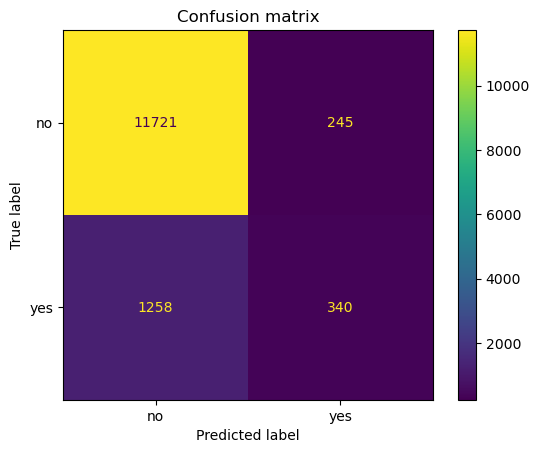

(13564,) (13564, 2)


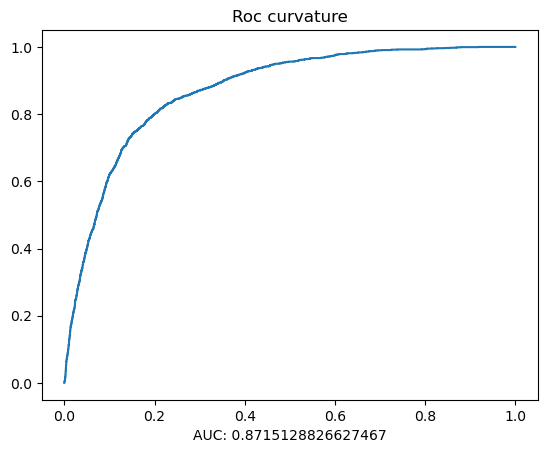

array([[0.89180649, 0.88919198, 0.26743374, 0.2680693 ]])

In [169]:
model_evaluate(LogisticRegression())

## DecisionTreeClassifier

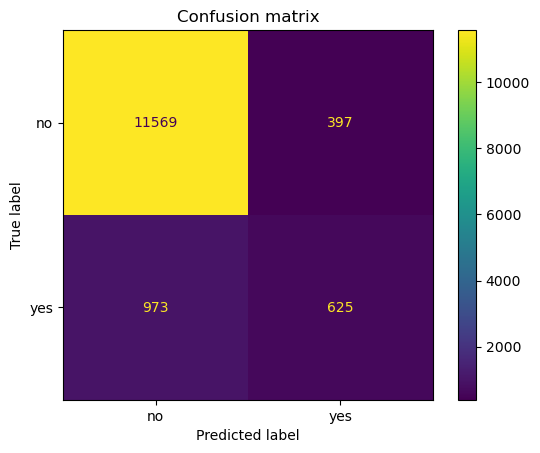

(13564,) (13564, 2)


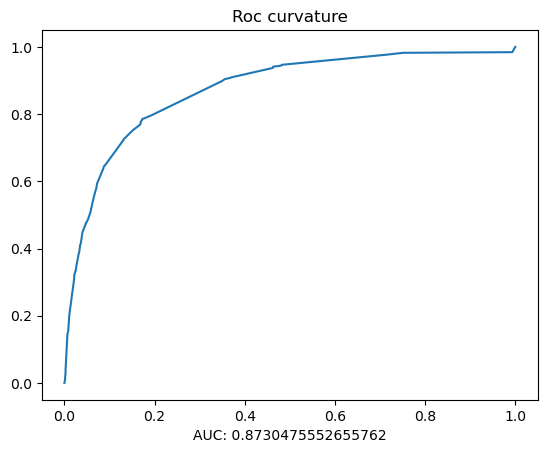

array([[0.9114924 , 0.89899735, 0.21853285, 0.32409779]])

In [170]:
model_evaluate(DecisionTreeClassifier(max_depth = 7))

## RandomForestClassifier

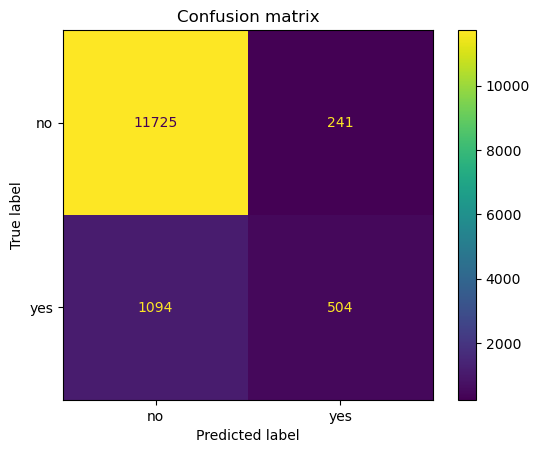

(13564,) (13564, 2)


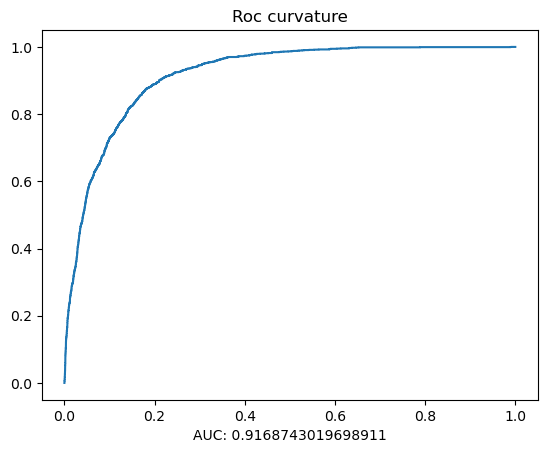

array([[0.9270073 , 0.90157771, 0.18879139, 0.22382738]])

In [171]:
model_evaluate(RandomForestClassifier(max_depth = 10))

## GradientBoostingClassifier

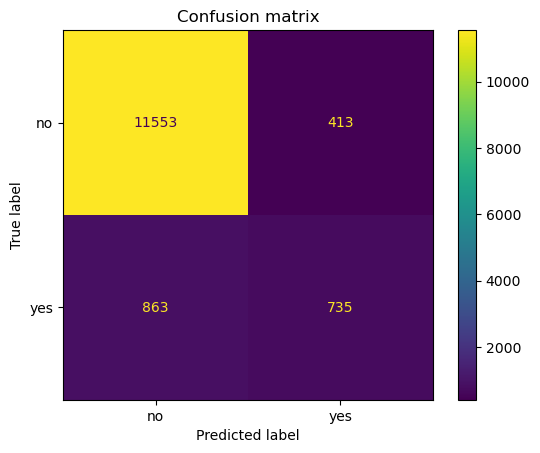

(13564,) (13564, 2)


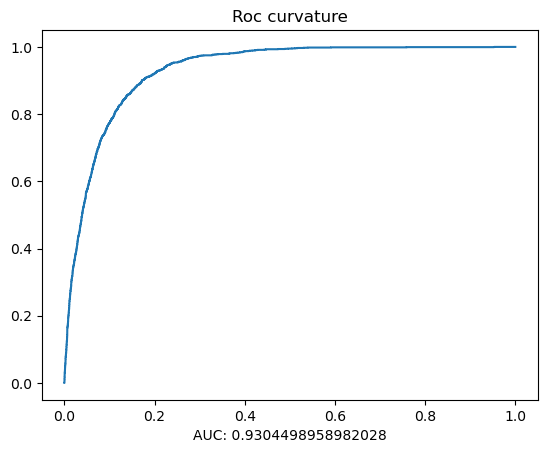

array([[0.94147945, 0.90592746, 0.15294336, 0.2055591 ]])

In [231]:
model_evaluate(GradientBoostingClassifier(max_depth = 6))

## Neural Network (MLPClassifier)

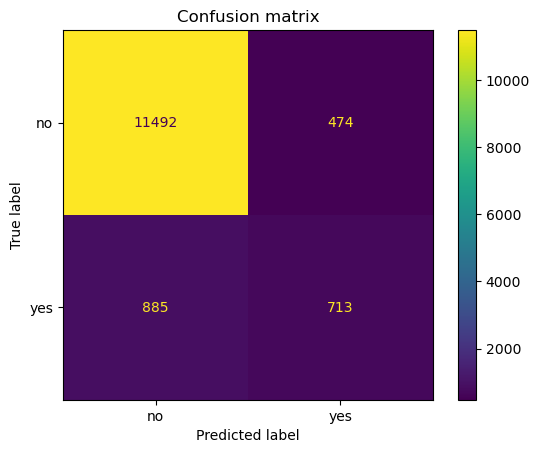

(13564,) (13564, 2)


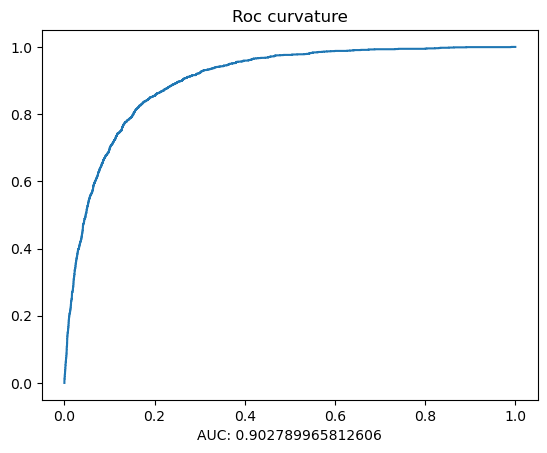

array([[0.90868013, 0.89980832, 0.21115186, 0.23159132]])

In [173]:
model_evaluate(MLPClassifier(hidden_layer_sizes = 40))

## Modellek összehasonlítása

In [192]:
def fineval(model):

    errors = []
    performance = []
        
    model.fit(X_tr,y_tr)

    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    acc_tr = accuracy_score(y_tr, y_pred_tr)
    acc_te = accuracy_score(y_te, y_pred_te)

    y_pred_proba_tr = model.predict_proba(X_tr)
    y_pred_proba_te = model.predict_proba(X_te)
    
    balanced_acc_tr = balanced_accuracy_score(y_tr, y_pred_tr)
    balanced_acc_te = balanced_accuracy_score(y_te, y_pred_te)
    
    auc_tr = roc_auc_score(np.where(y_tr == "no",0,1),y_pred_proba_tr[:,1])
    auc_te = roc_auc_score(np.where(y_te == "no",0,1),y_pred_proba_te[:,1])
    
    errors.append([acc_tr,acc_te,balanced_acc_tr, balanced_acc_te,auc_tr,auc_te])
    
    fpr, tpr, thresholds = roc_curve(np.where(y_te == "no",0,1), y_pred_proba_te[:,1])
    plt.plot(fpr, tpr, label = f"{model}: {round(auc_te,3)}")
    plt.title("ROC curvature comparison")
    plt.legend()
        
    performance.append(np.array(errors).mean(axis = 0))
    return np.array(performance)

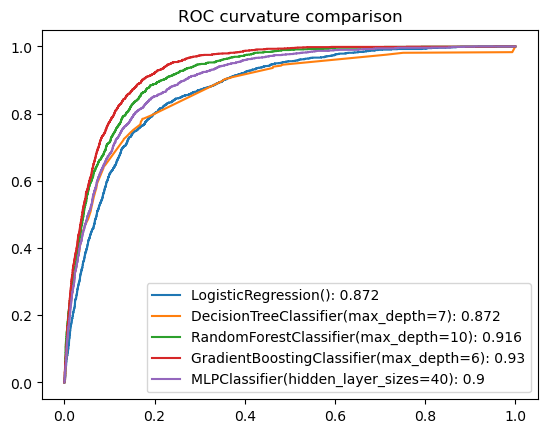

In [234]:
log = fineval(LogisticRegression())
dec = fineval(DecisionTreeClassifier(max_depth = 7))
rand = fineval(RandomForestClassifier(max_depth = 10))
grad = fineval(GradientBoostingClassifier(max_depth = 6))
neural = fineval(MLPClassifier(hidden_layer_sizes = 40))

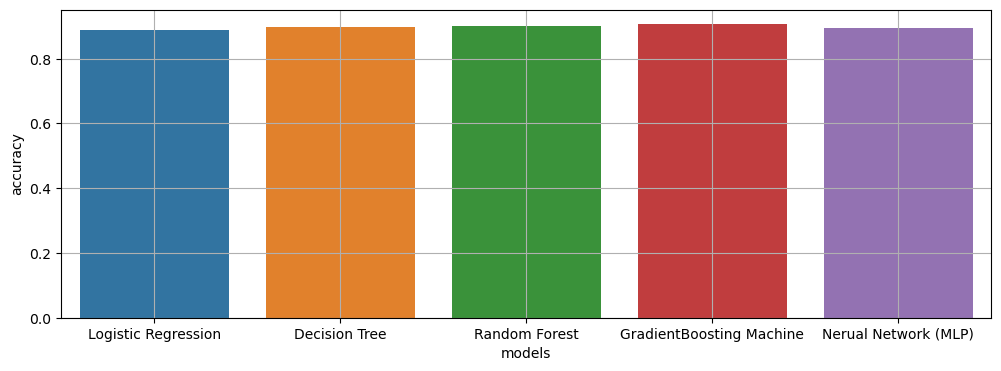

In [235]:

data = pd.DataFrame({
    "models" : ["Logistic Regression", "Decision Tree", "Random Forest", "GradientBoosting Machine", "Nerual Network (MLP)"],
    "accuracy" : [log[0,1],dec[0,1],rand[0,1],grad[0,1],neural[0,1]]
})
plt.figure(figsize=(12, 4))
sns.barplot(data, x="models", y="accuracy")
plt.grid()

In [236]:
data

models  accuracy
0       Logistic Regression  0.889192
1             Decision Tree  0.898850
2             Random Forest  0.900251
3  GradientBoosting Machine  0.906075
4      Nerual Network (MLP)  0.895385

## Választott modell: GradientBoosting Machine